# Interesting Maps

In [1]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random

import pickle
from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from qiskit.circuit.random import random_circuit

from src import *
#np.set_printoptions(threshold=sys.maxsize)

## Generating Kraus Maps from Highly Structured Unitary Matrices

In [2]:
def generate_random_circuit_unitary(d, rank, depth):  
    n_eff = int(np.log2(d*rank))
    random_circ = random_circuit(n_eff, depth)
    U = qk.quantum_info.Operator(random_circ).data
    
    return U


t = np.linspace(0,2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

### Linear Depth

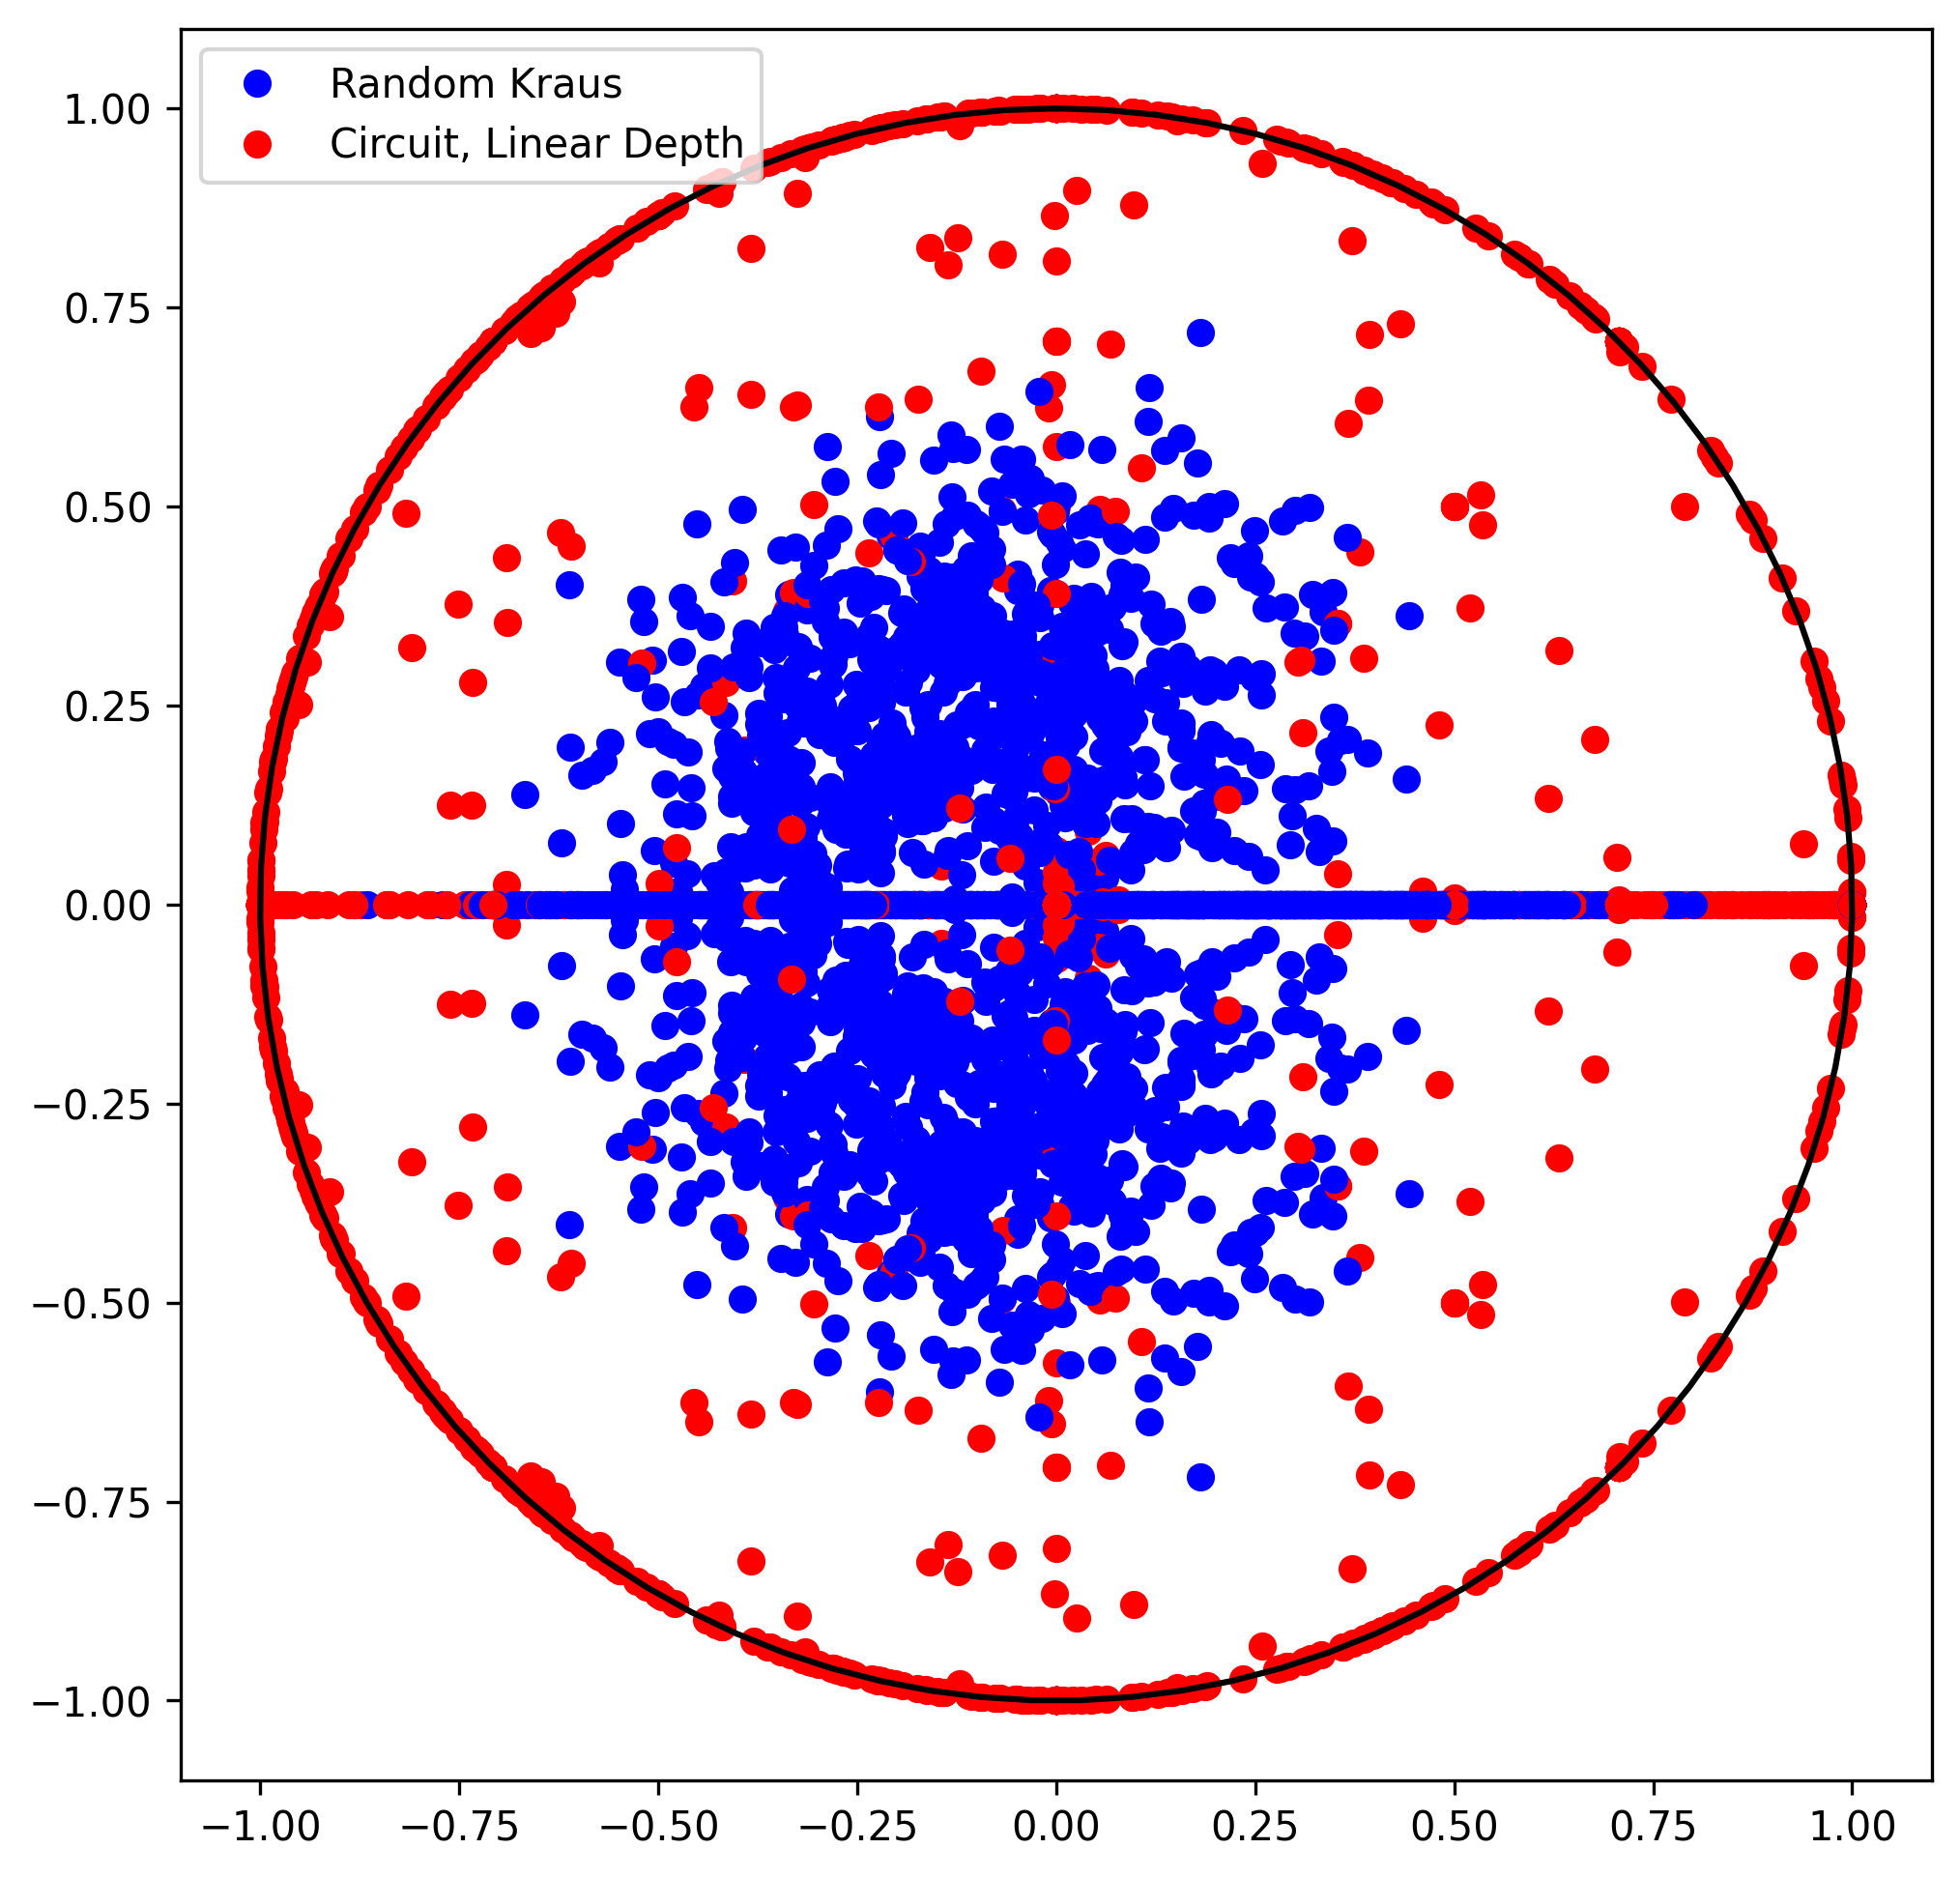

In [3]:
n = 1
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(1000)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    
    
    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Linear Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/oneQubit_linearDepth.pdf")
plt.show()

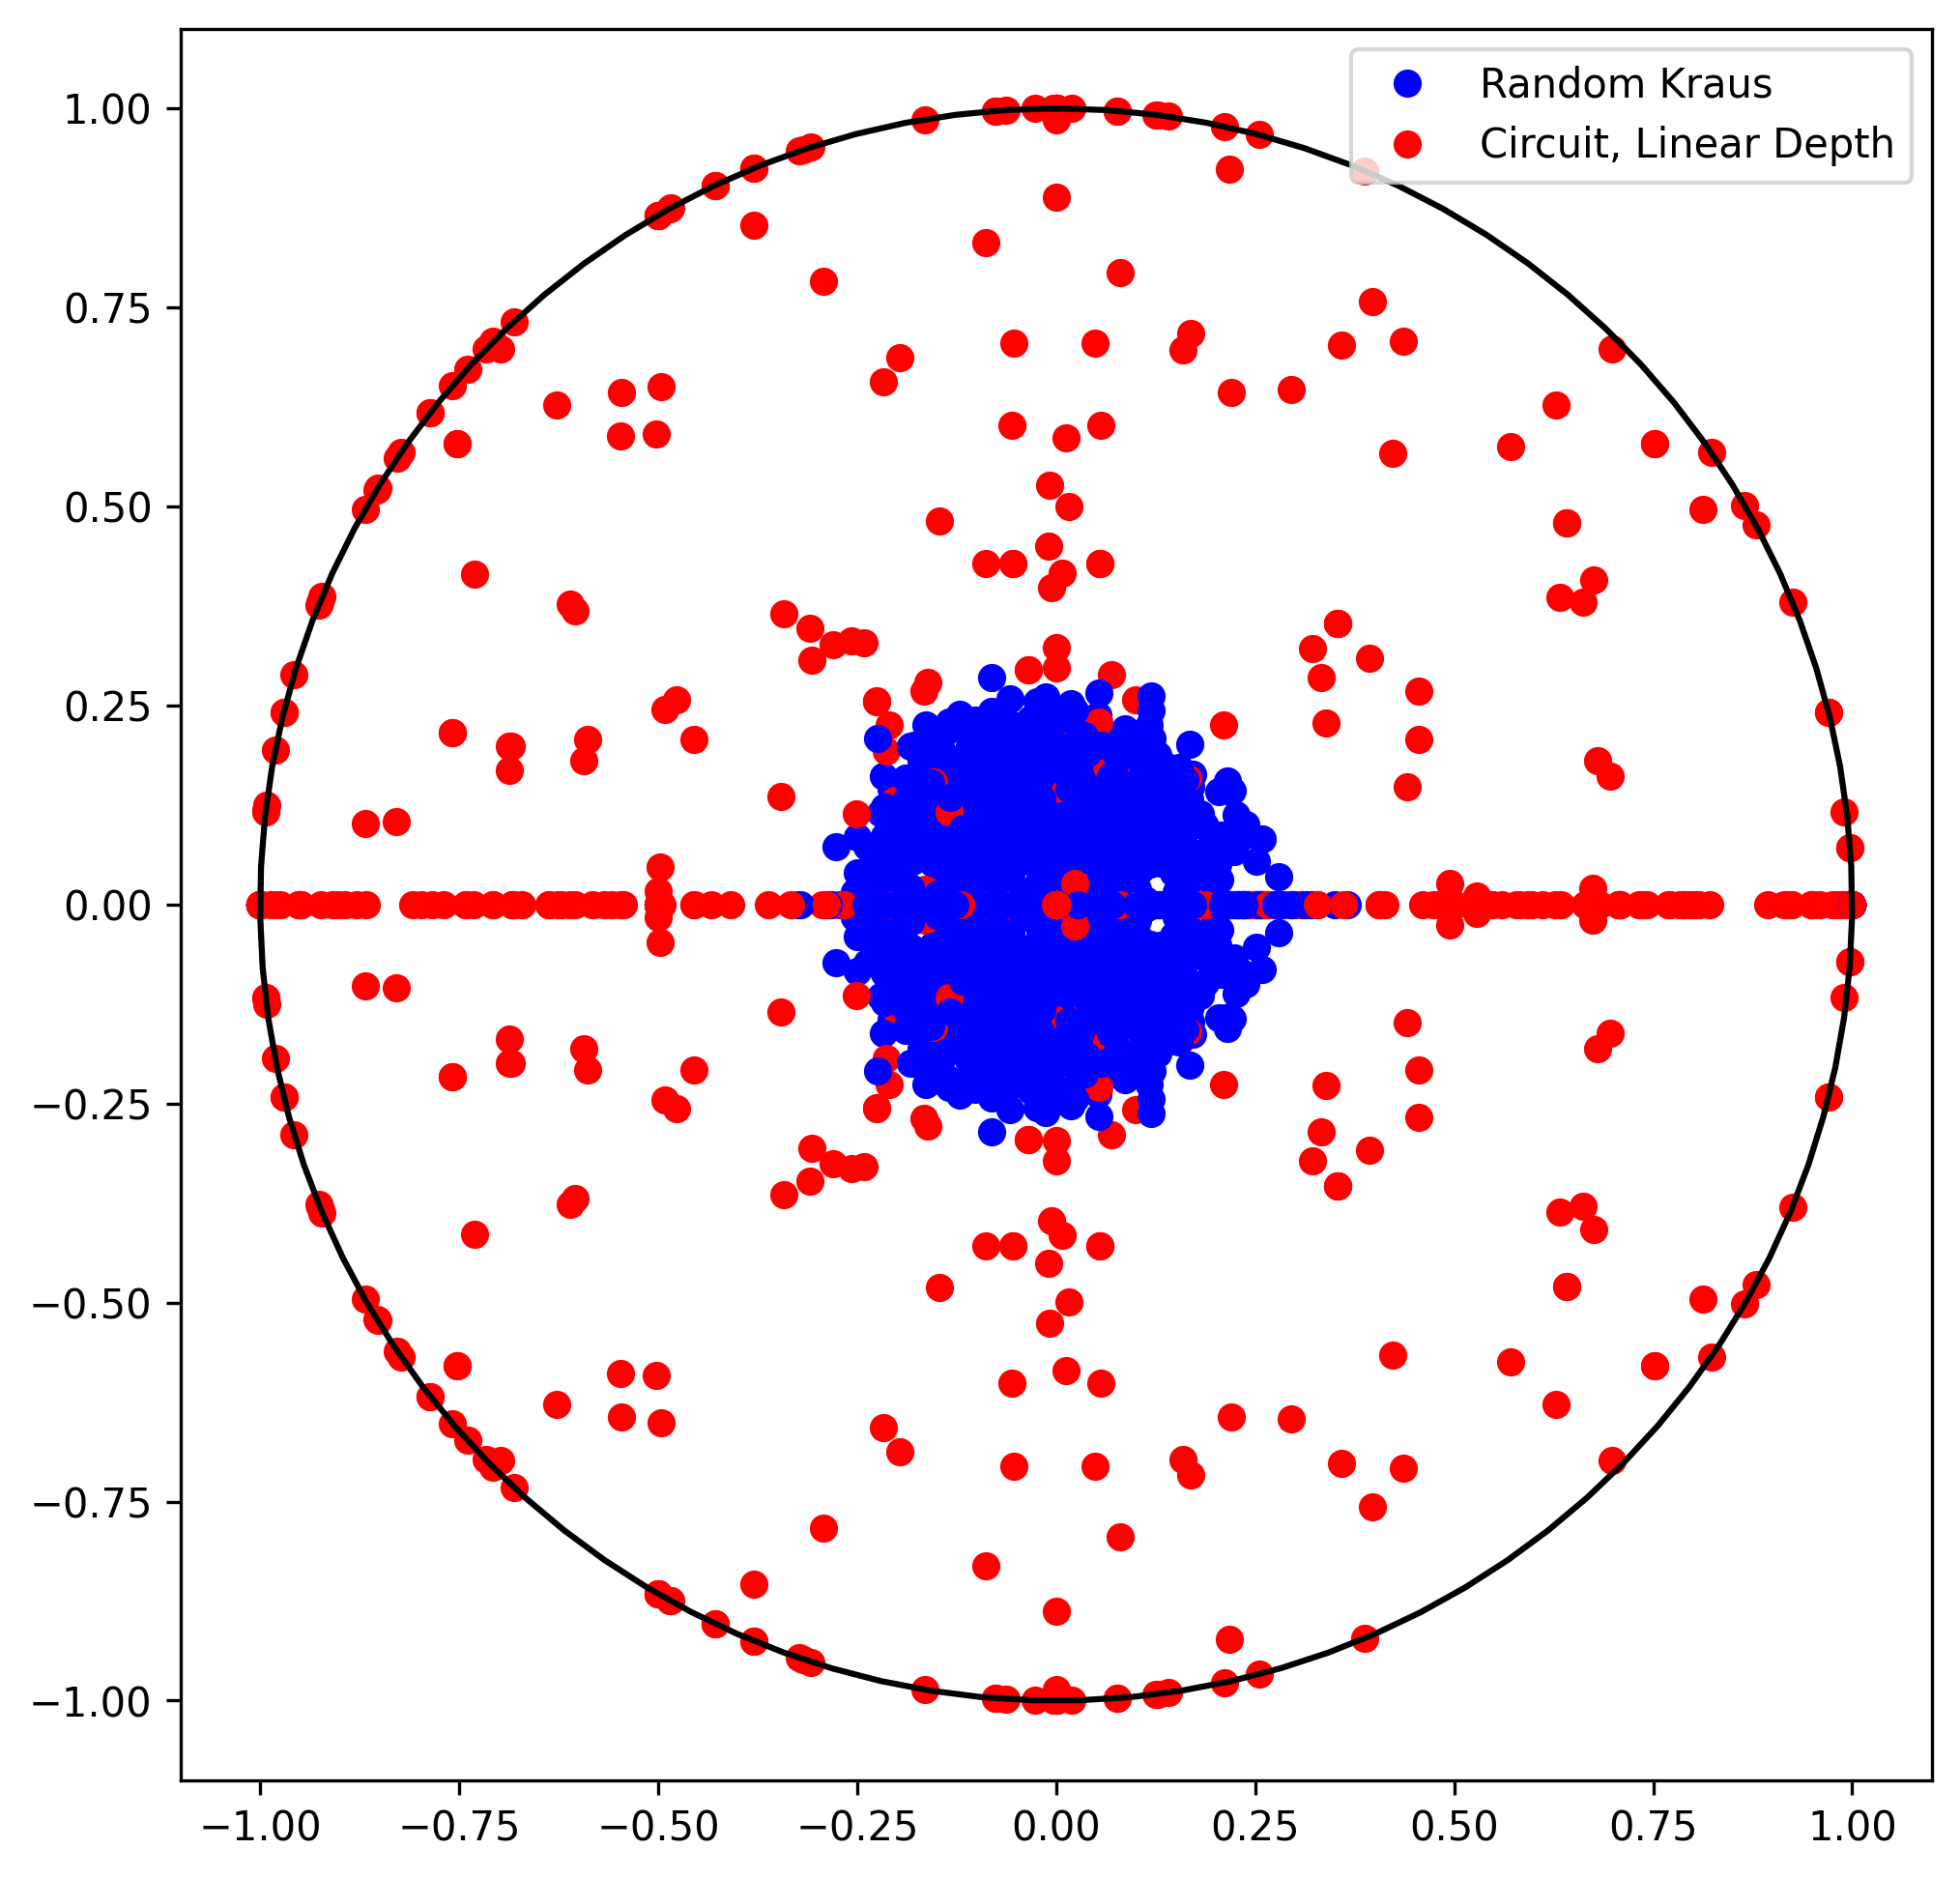

In [4]:
n = 2
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(100)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    
    
    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Linear Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/twoQubit_linearDepth.pdf")
plt.show()

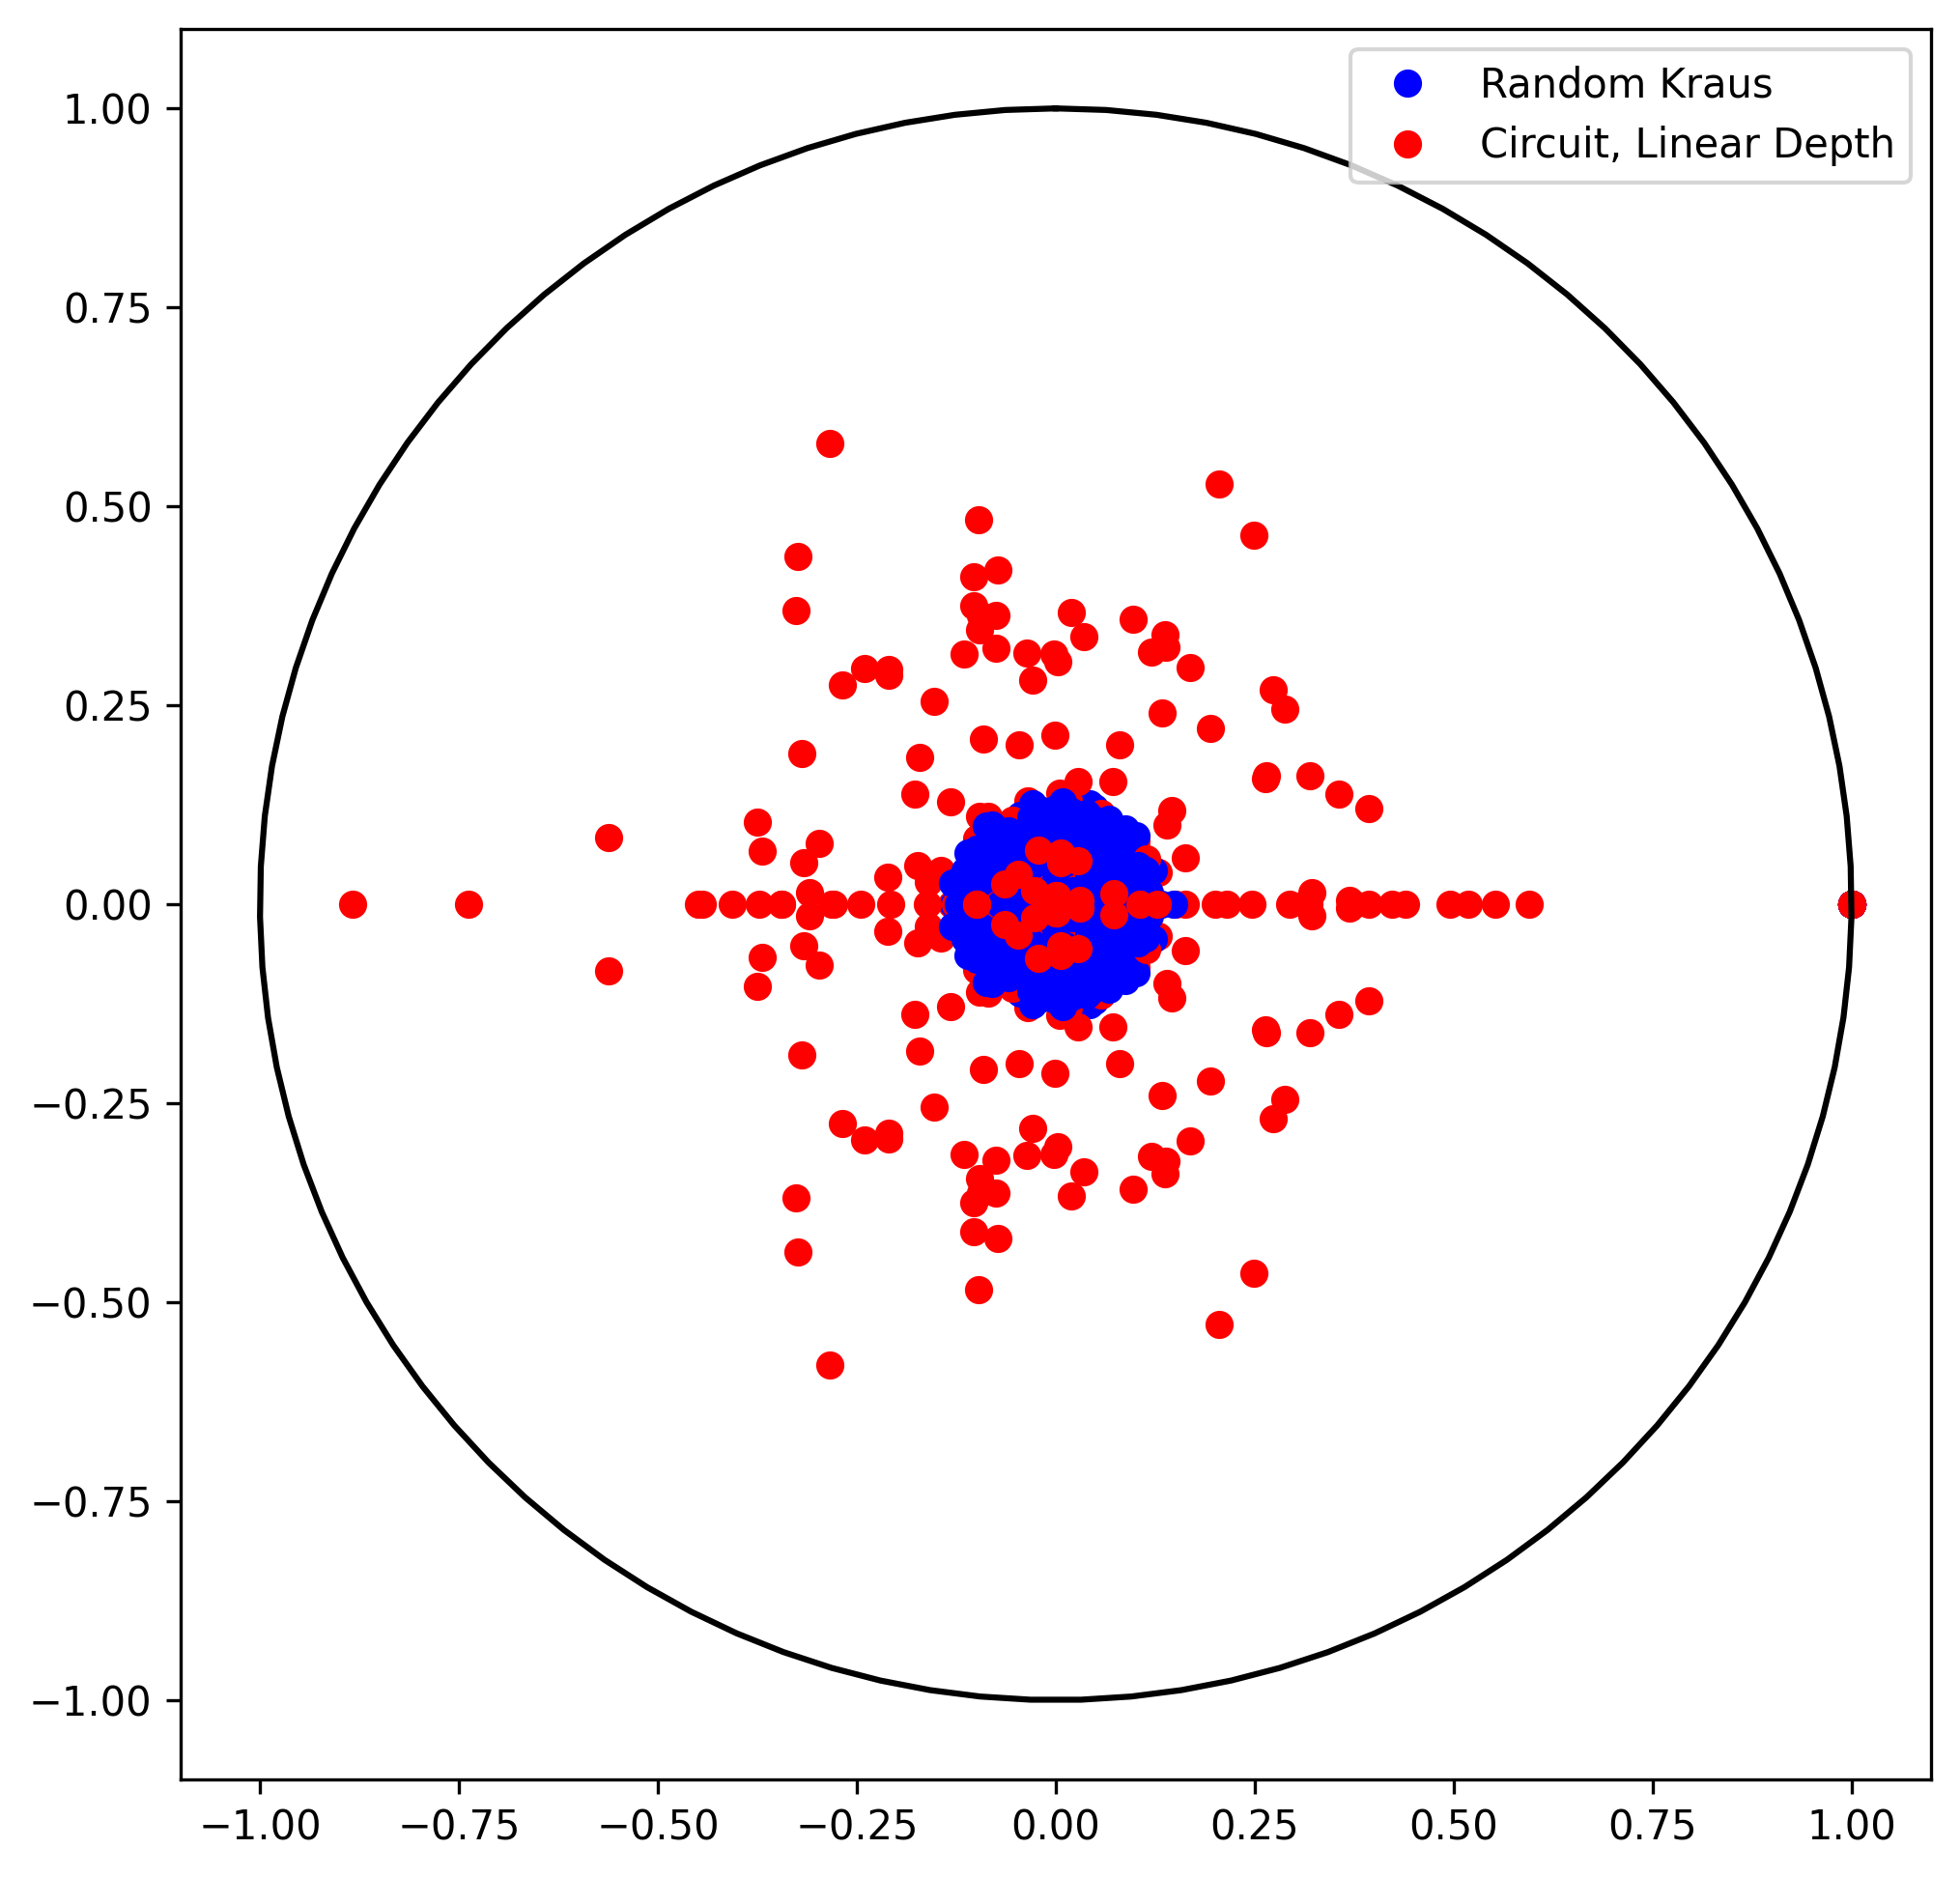

In [5]:
n = 3
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(10)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    
    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Linear Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/threeQubit_linearDepth.pdf")
plt.show()

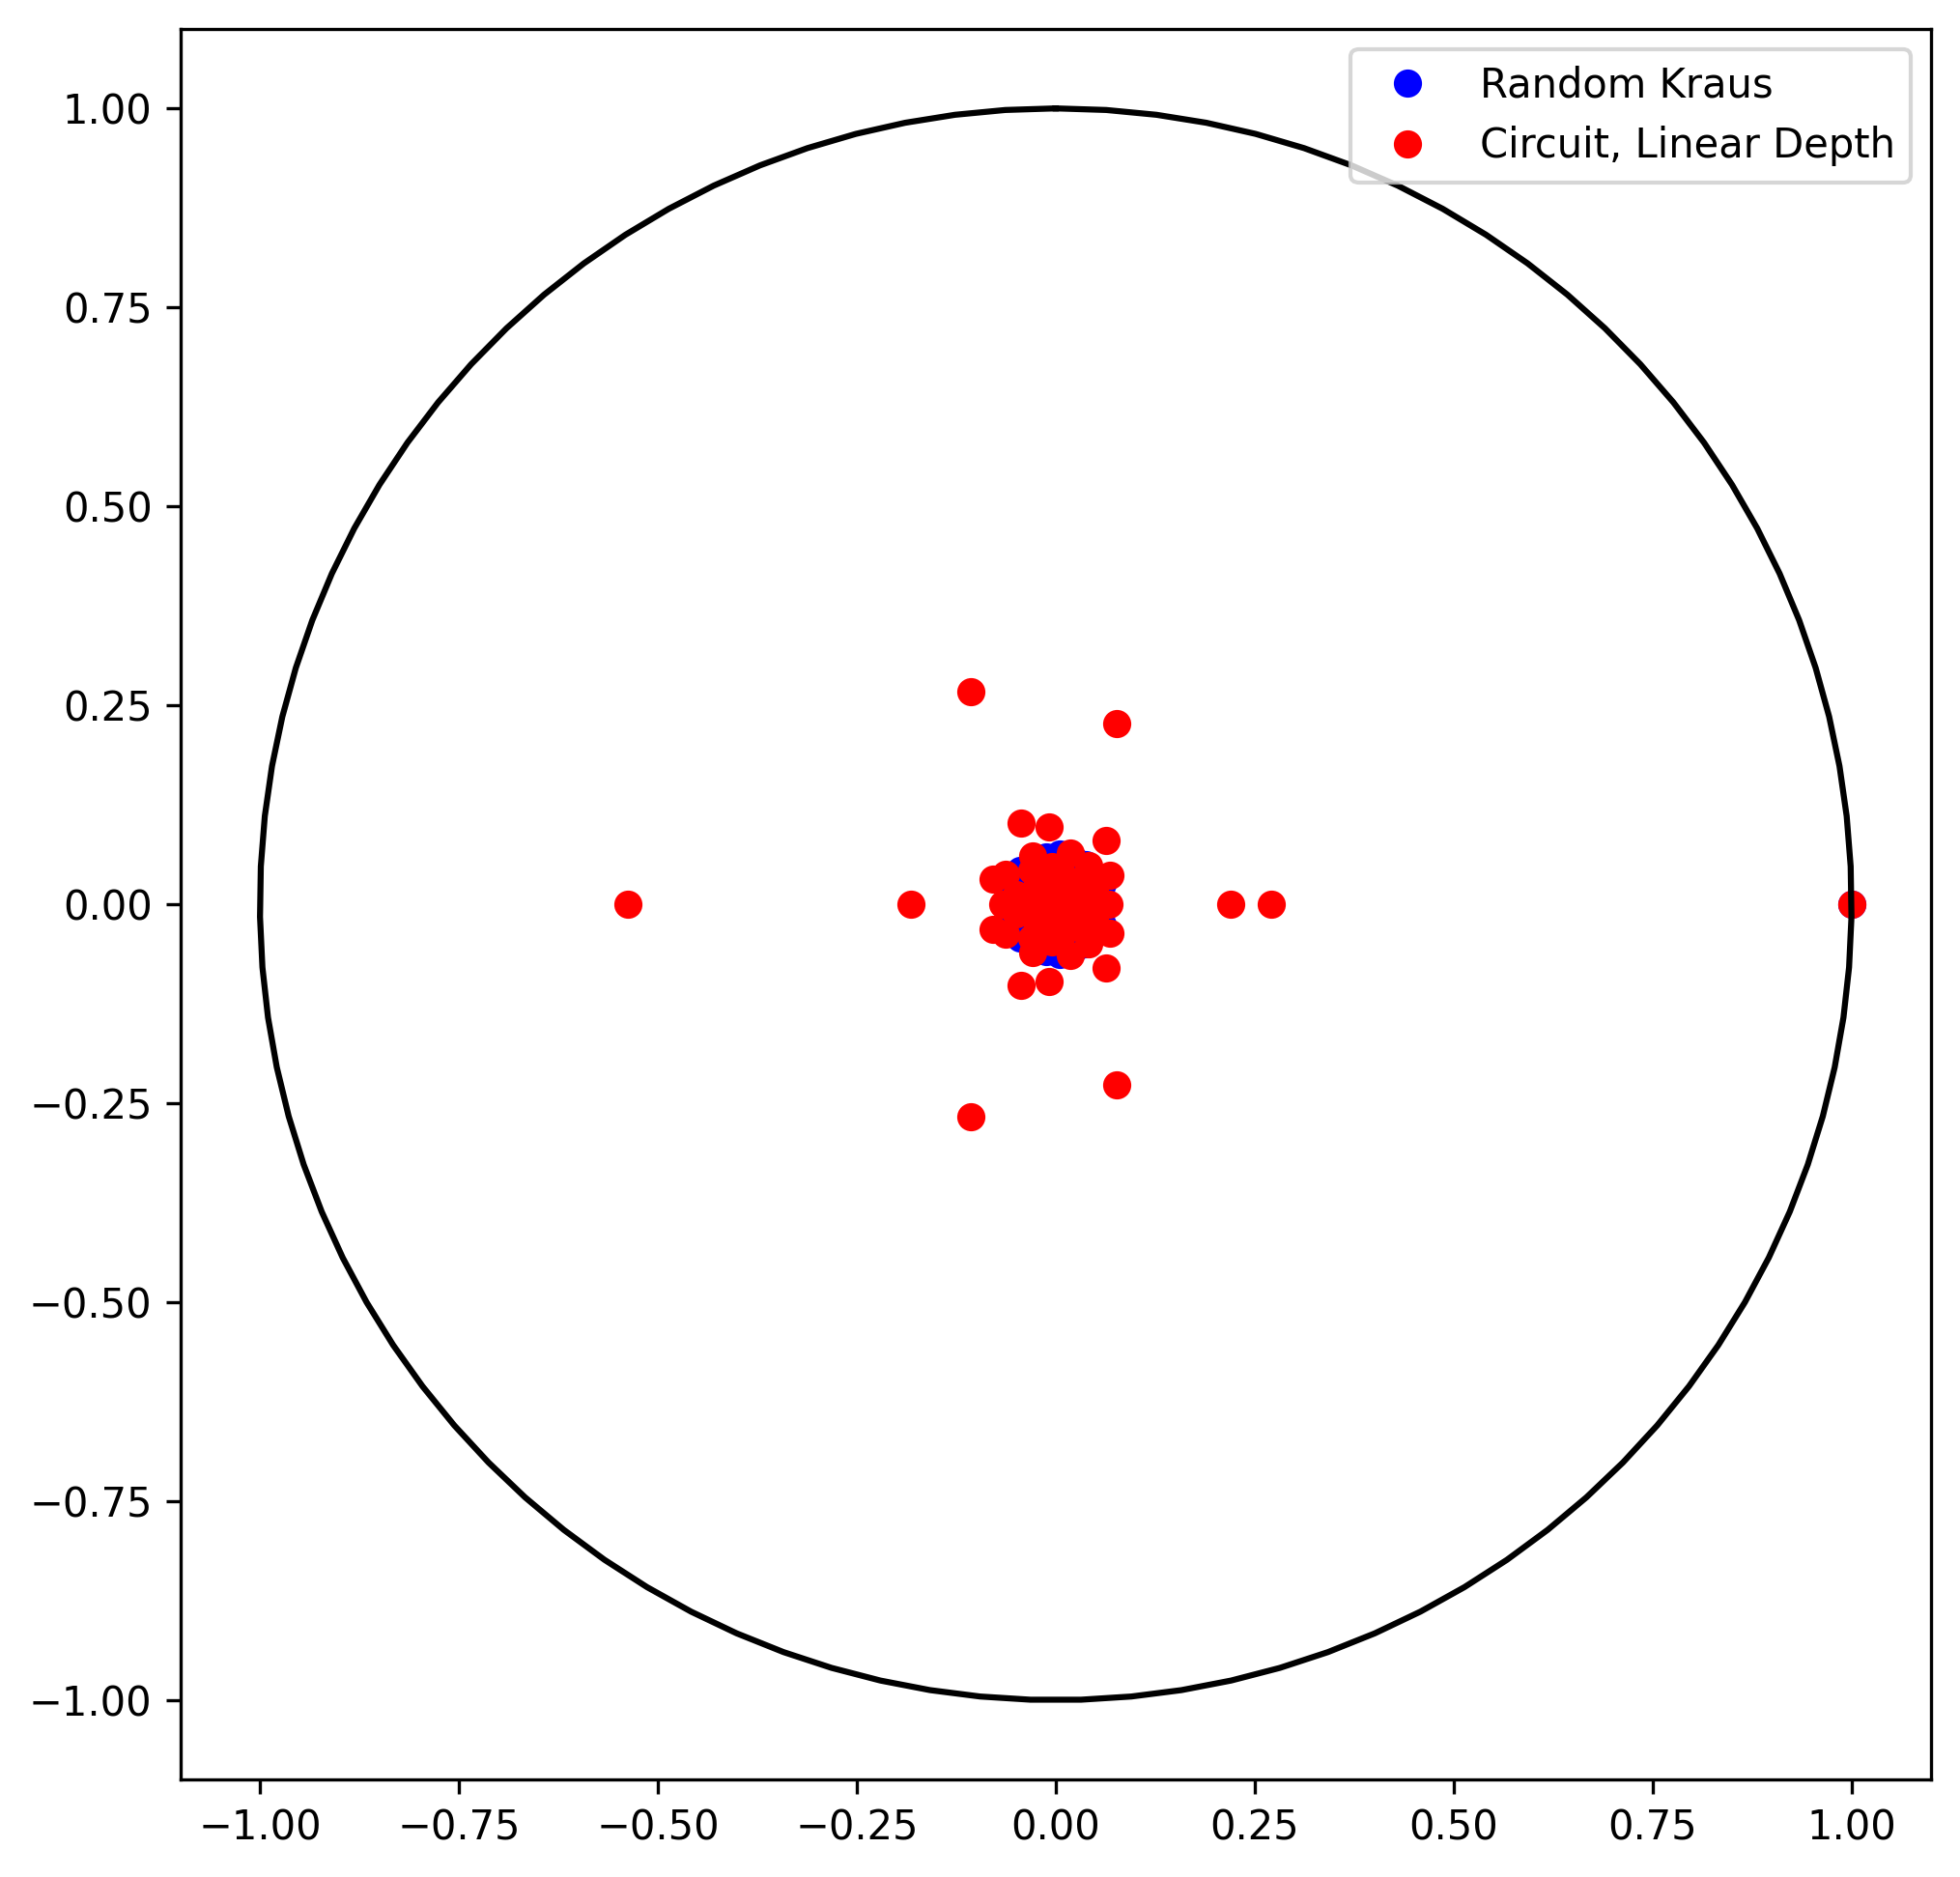

In [6]:
n = 4
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in range(1):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    
    
    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Linear Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/fourQubit_linearDepth.pdf")
plt.show()

### Square Depth

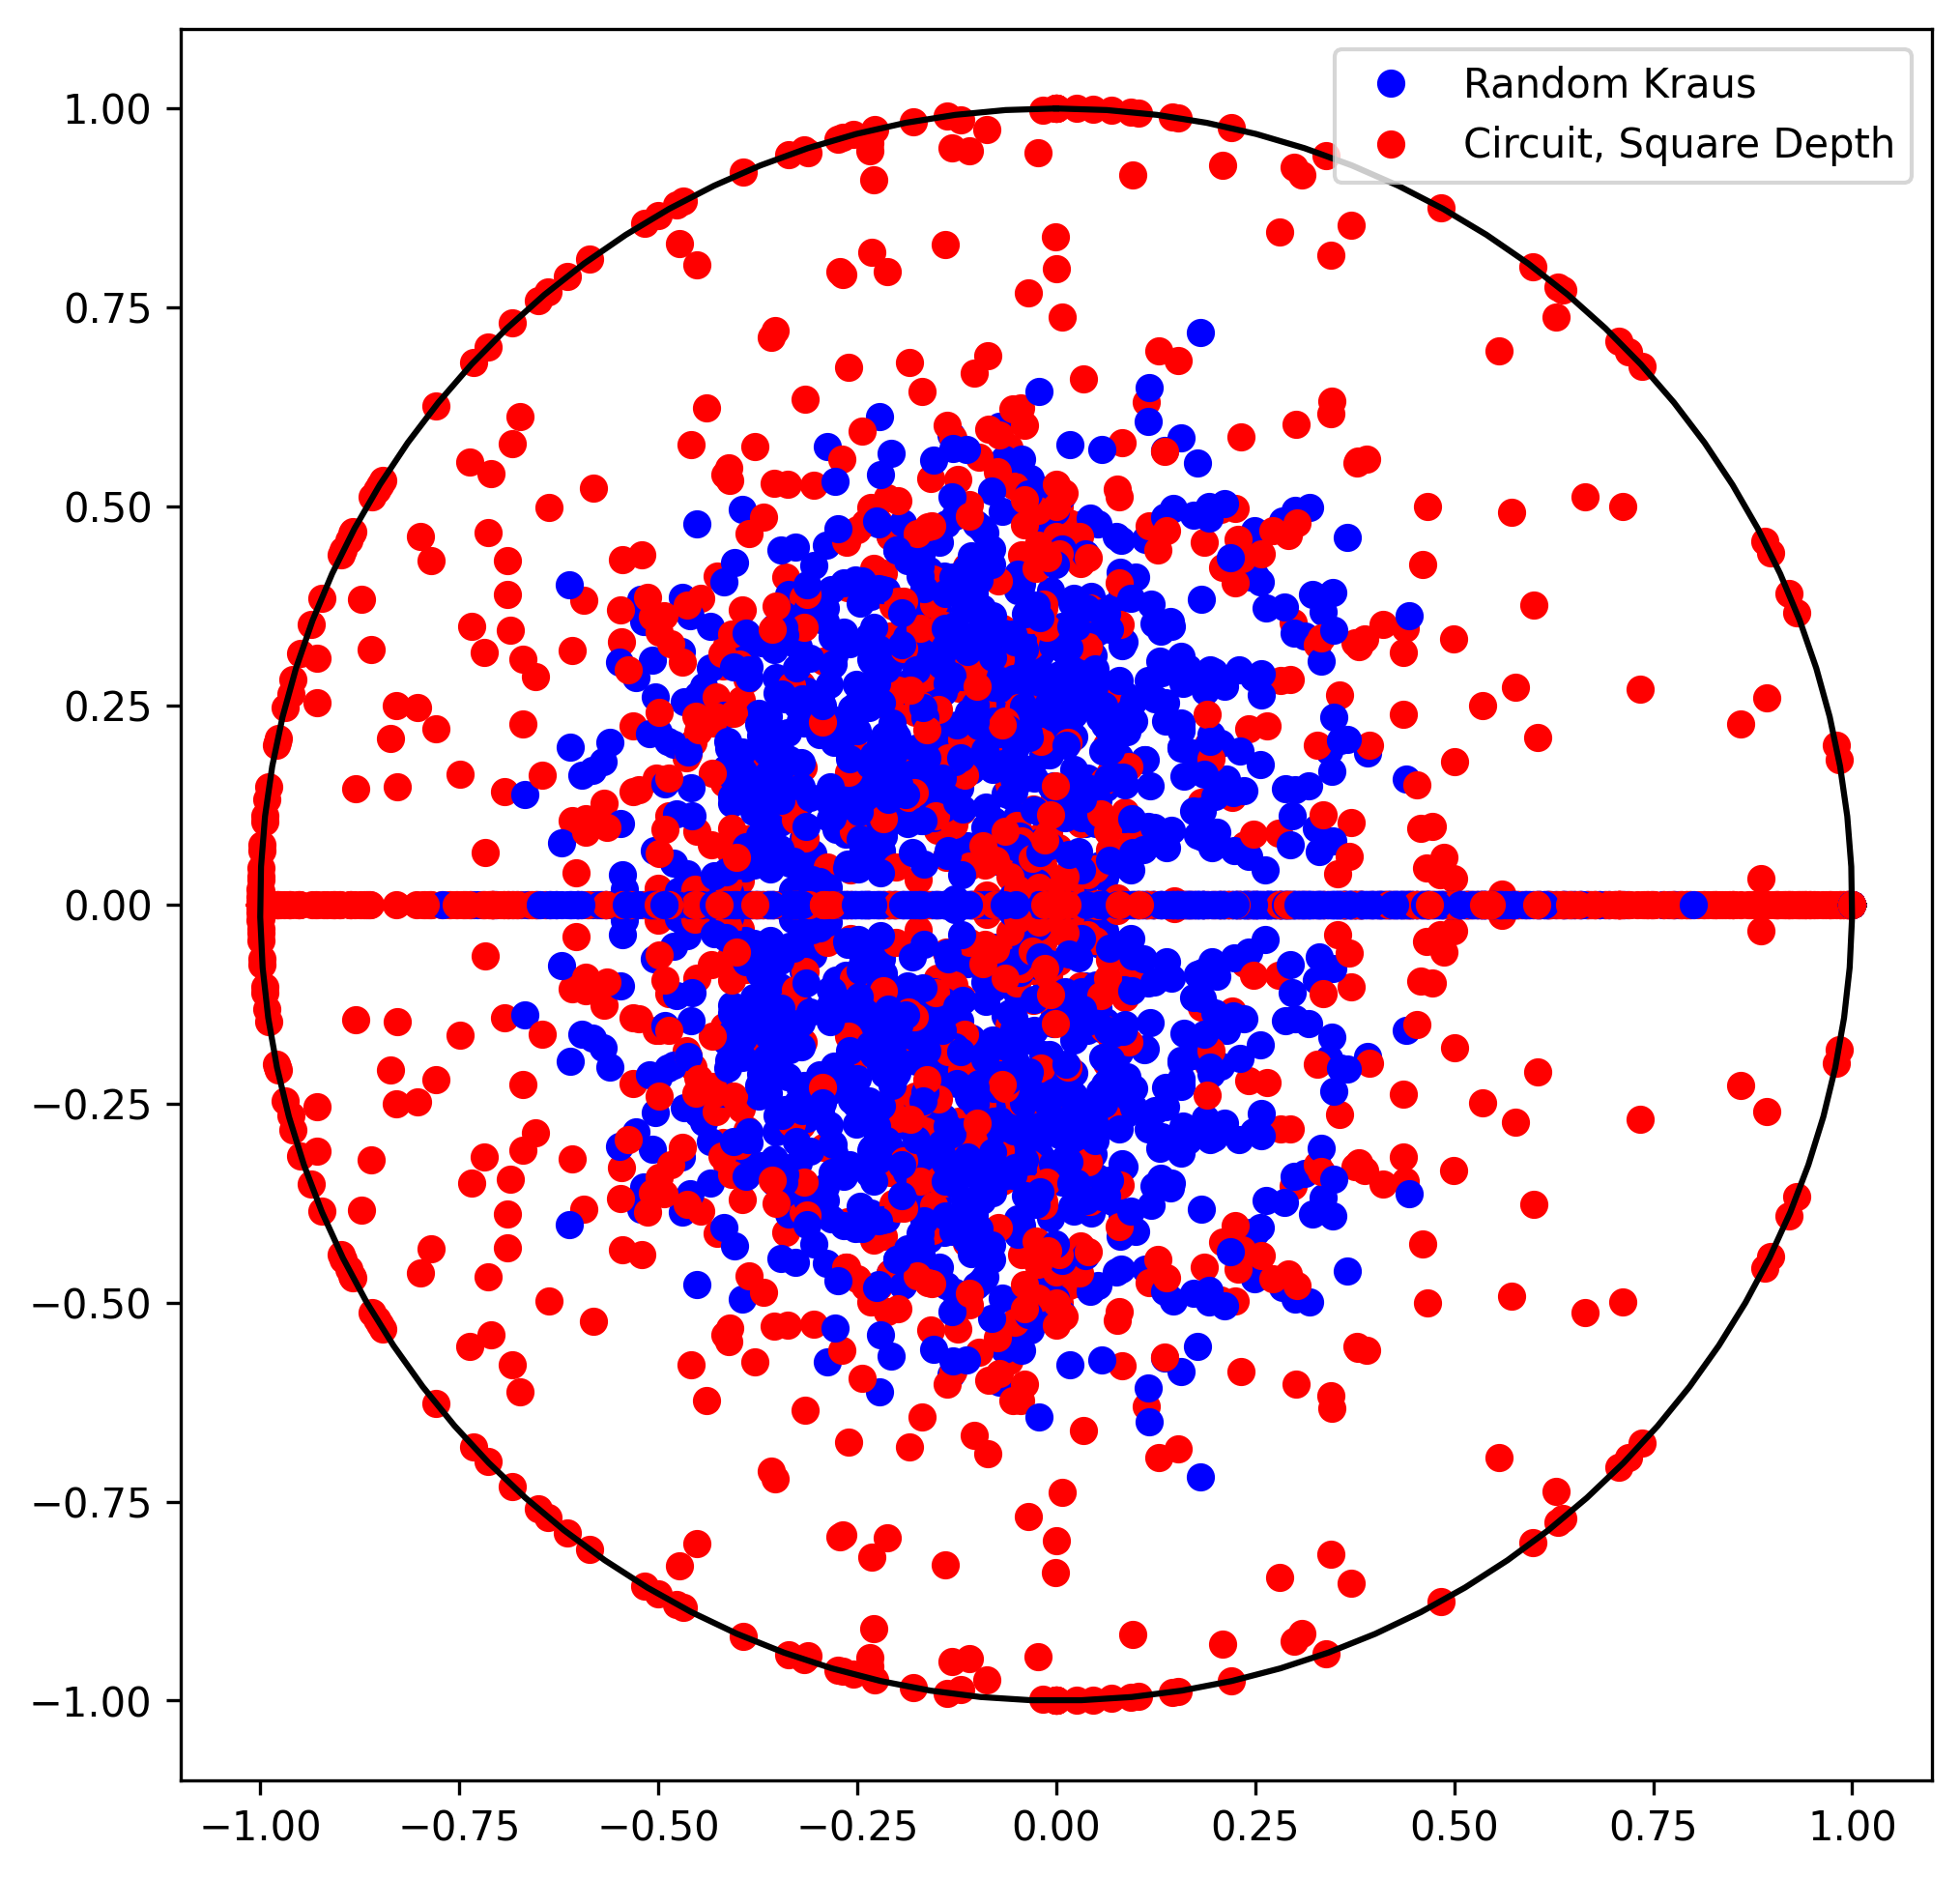

In [7]:
n = 1
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(1000)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff**2)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    
    
    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/oneQubit_squareDepth.pdf")
plt.show()

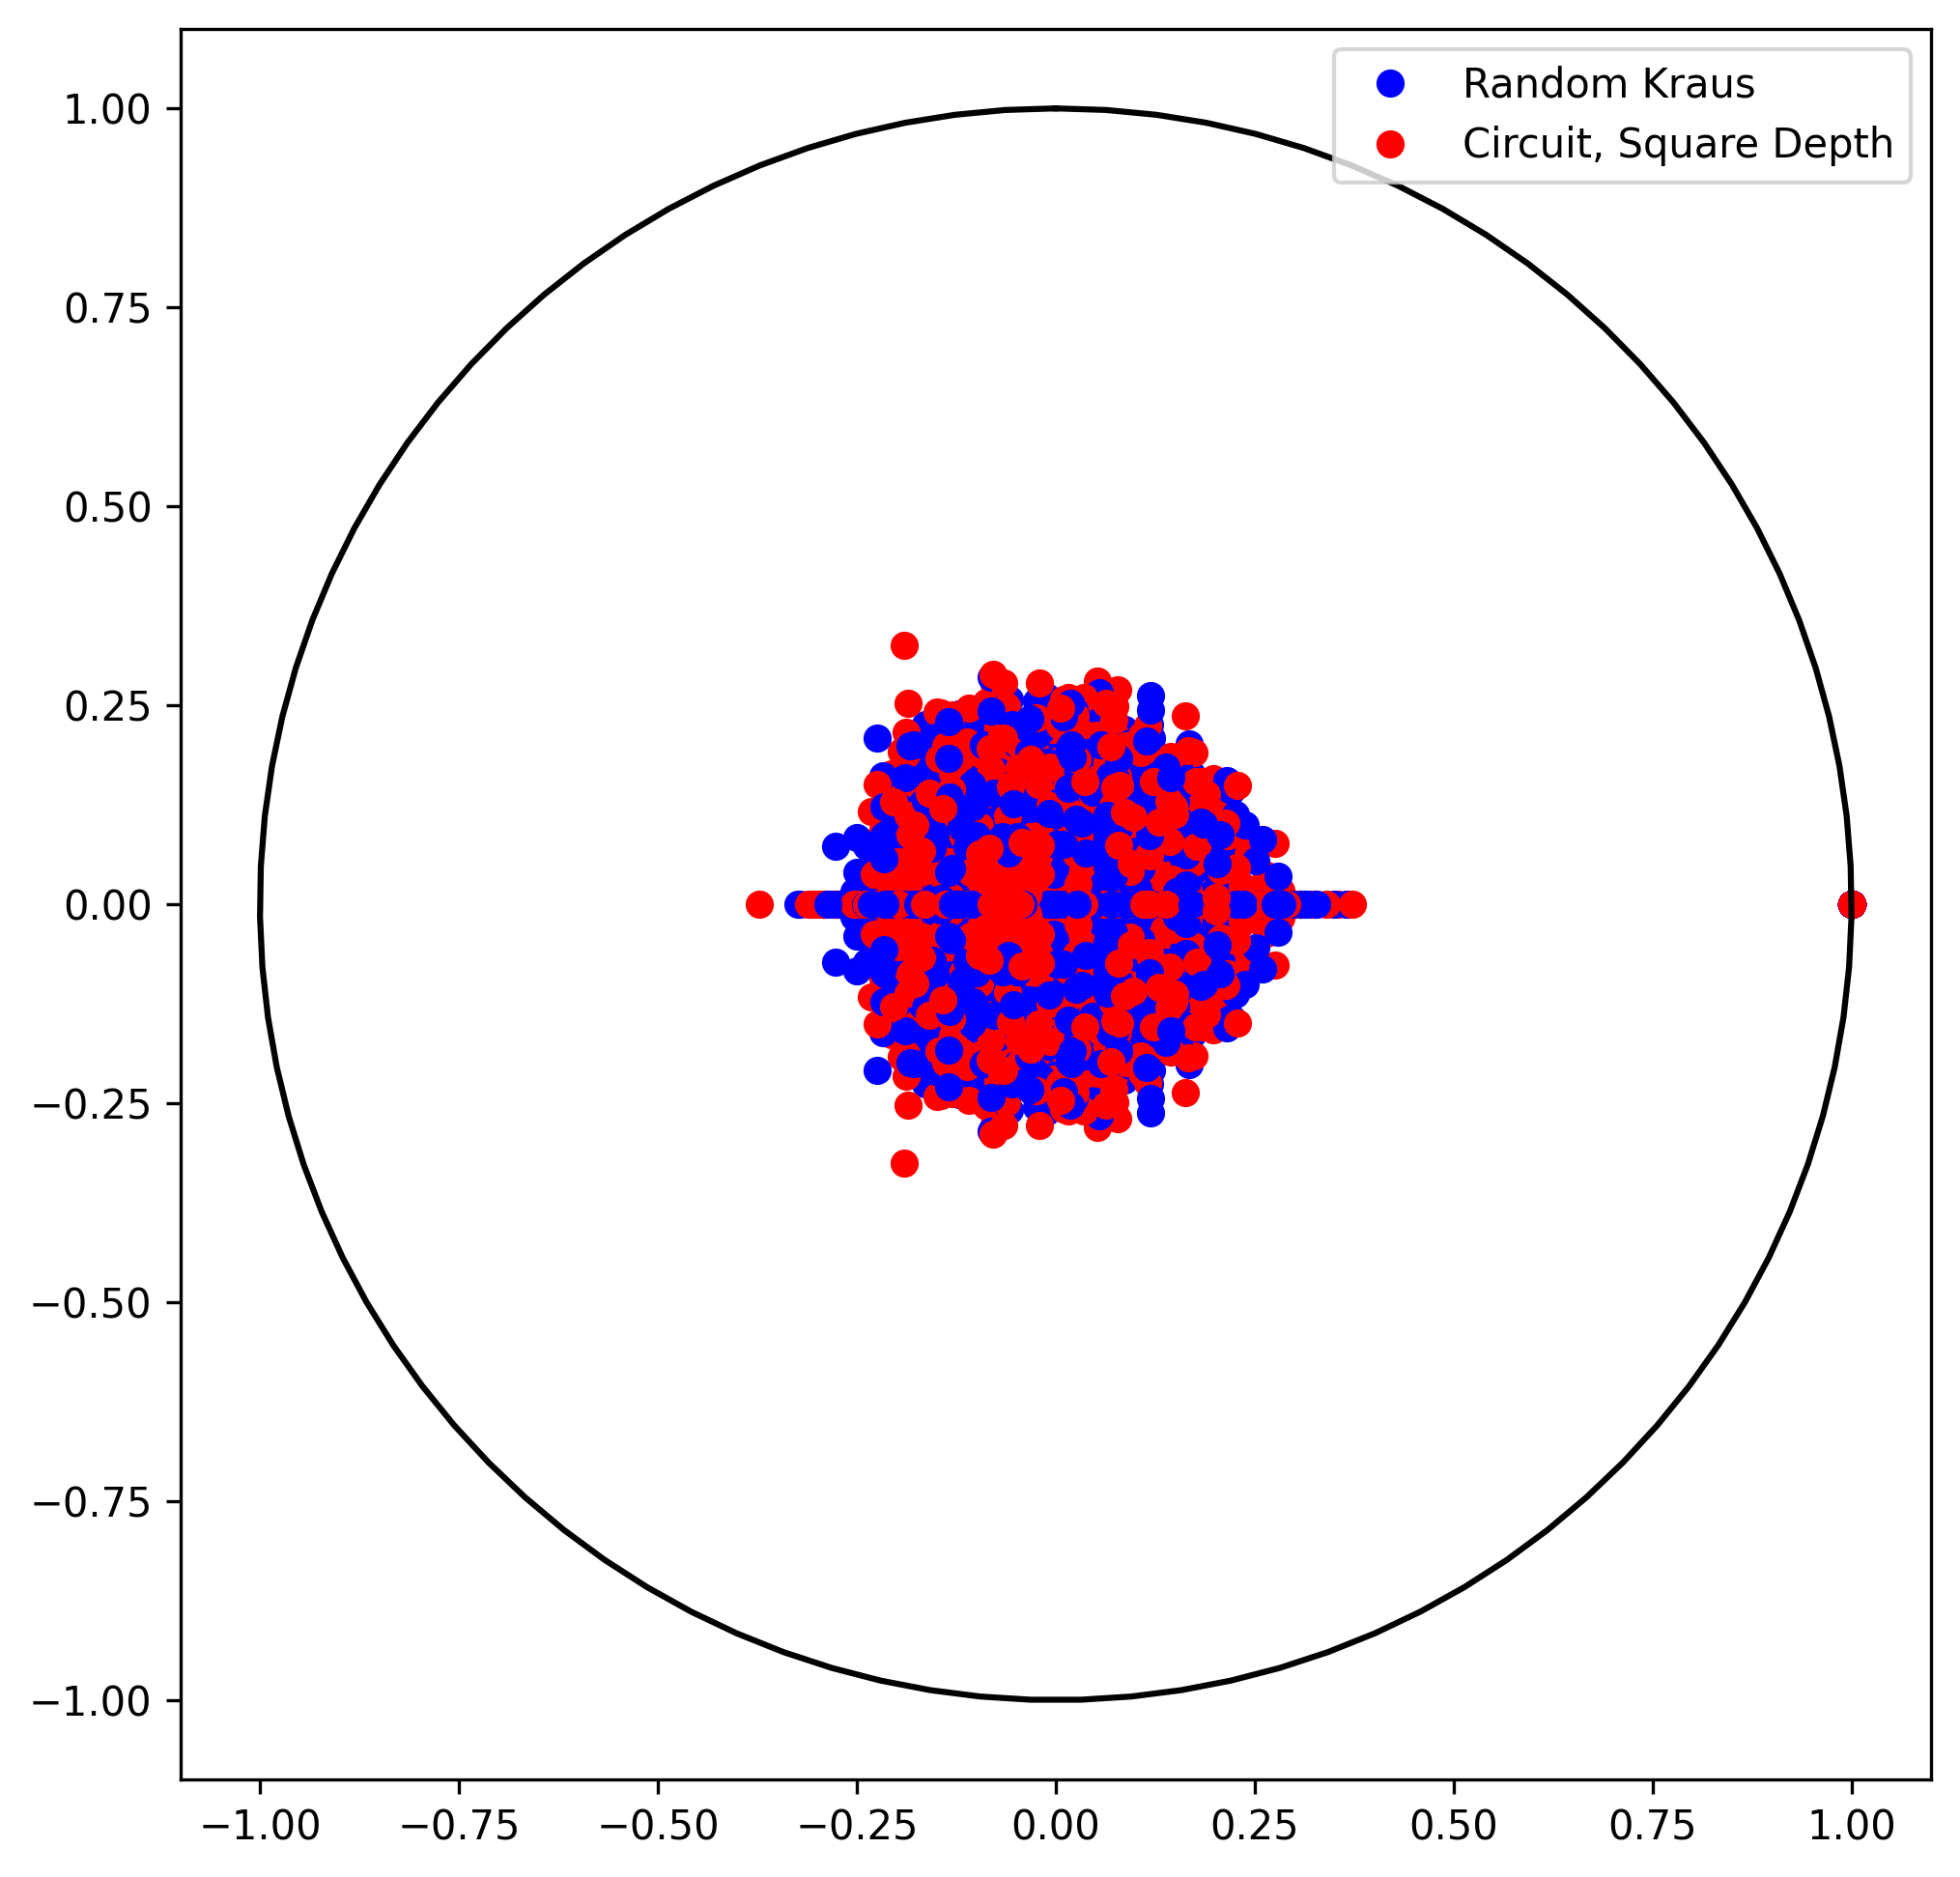

In [8]:
n = 2
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(100)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff**2)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    
    
    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/twoQubit_squareDepth.pdf")
plt.show()

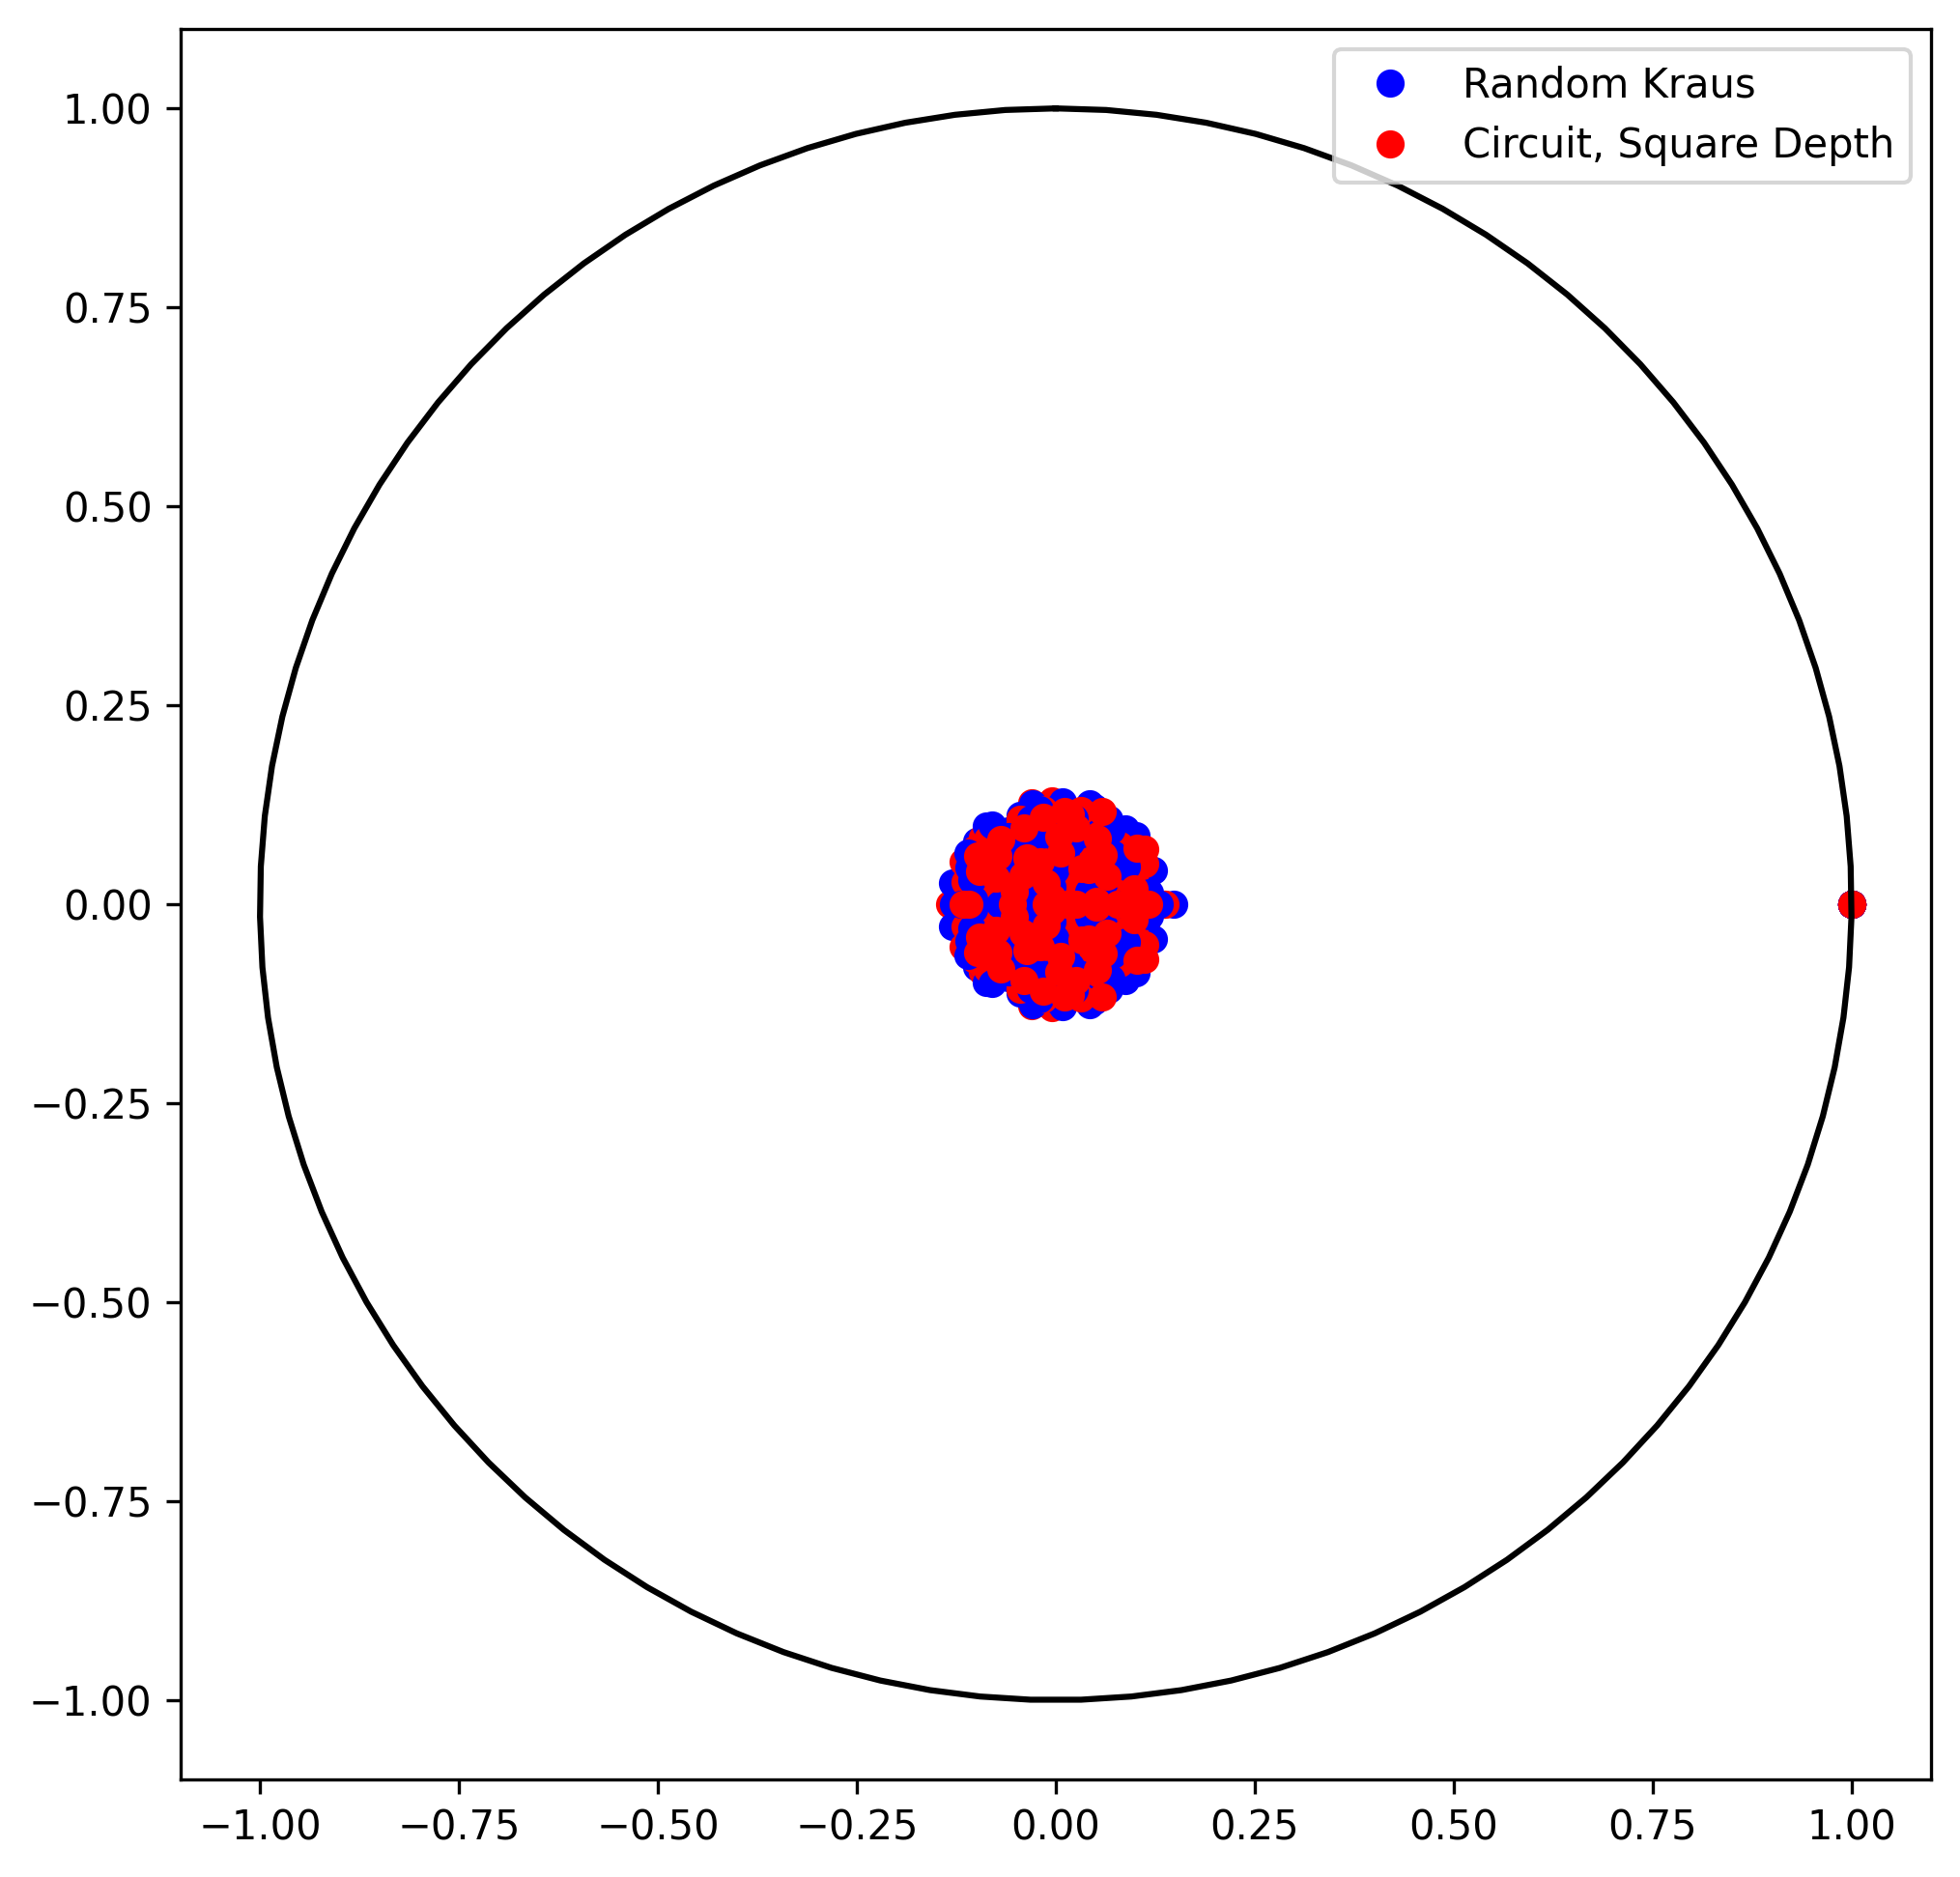

In [9]:
n = 3
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(10)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff**2)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    
    
    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/threeQubit_squareDepth.pdf")
plt.show()

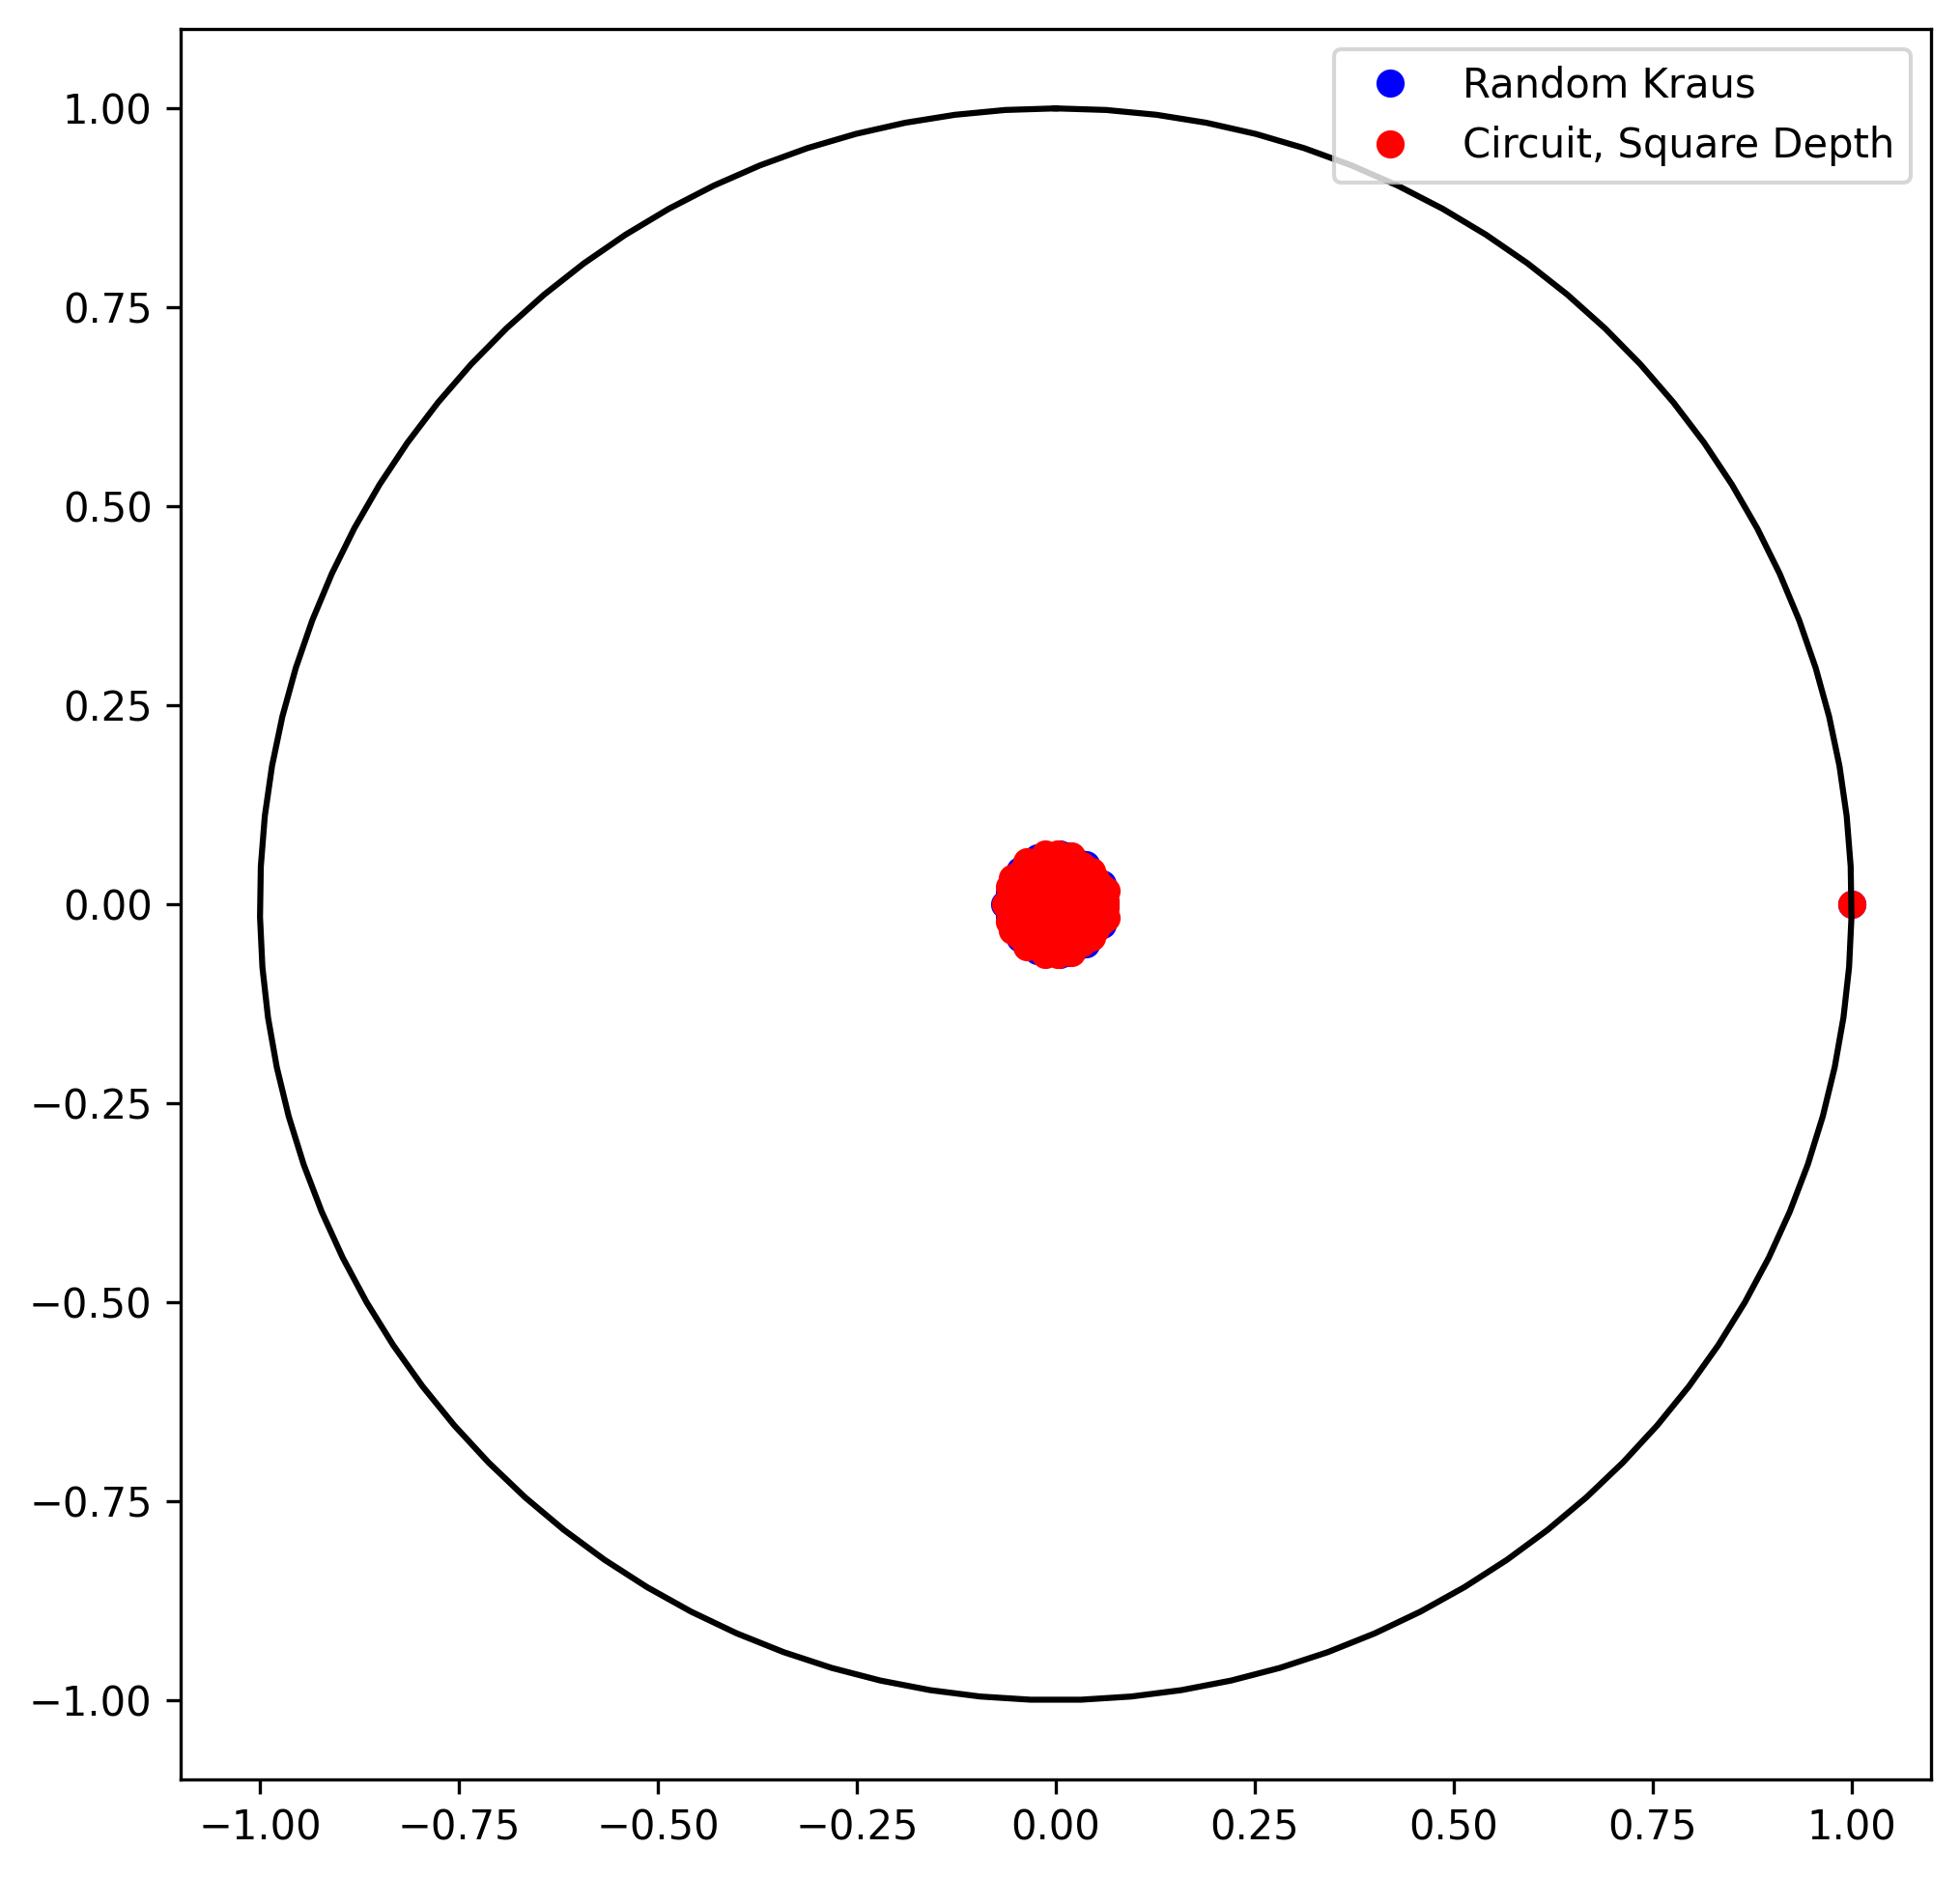

In [10]:
n = 4
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in range(1):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=n_eff**2)
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/fourQubit_squareDepth.pdf")
plt.show()

### Square Root Depth

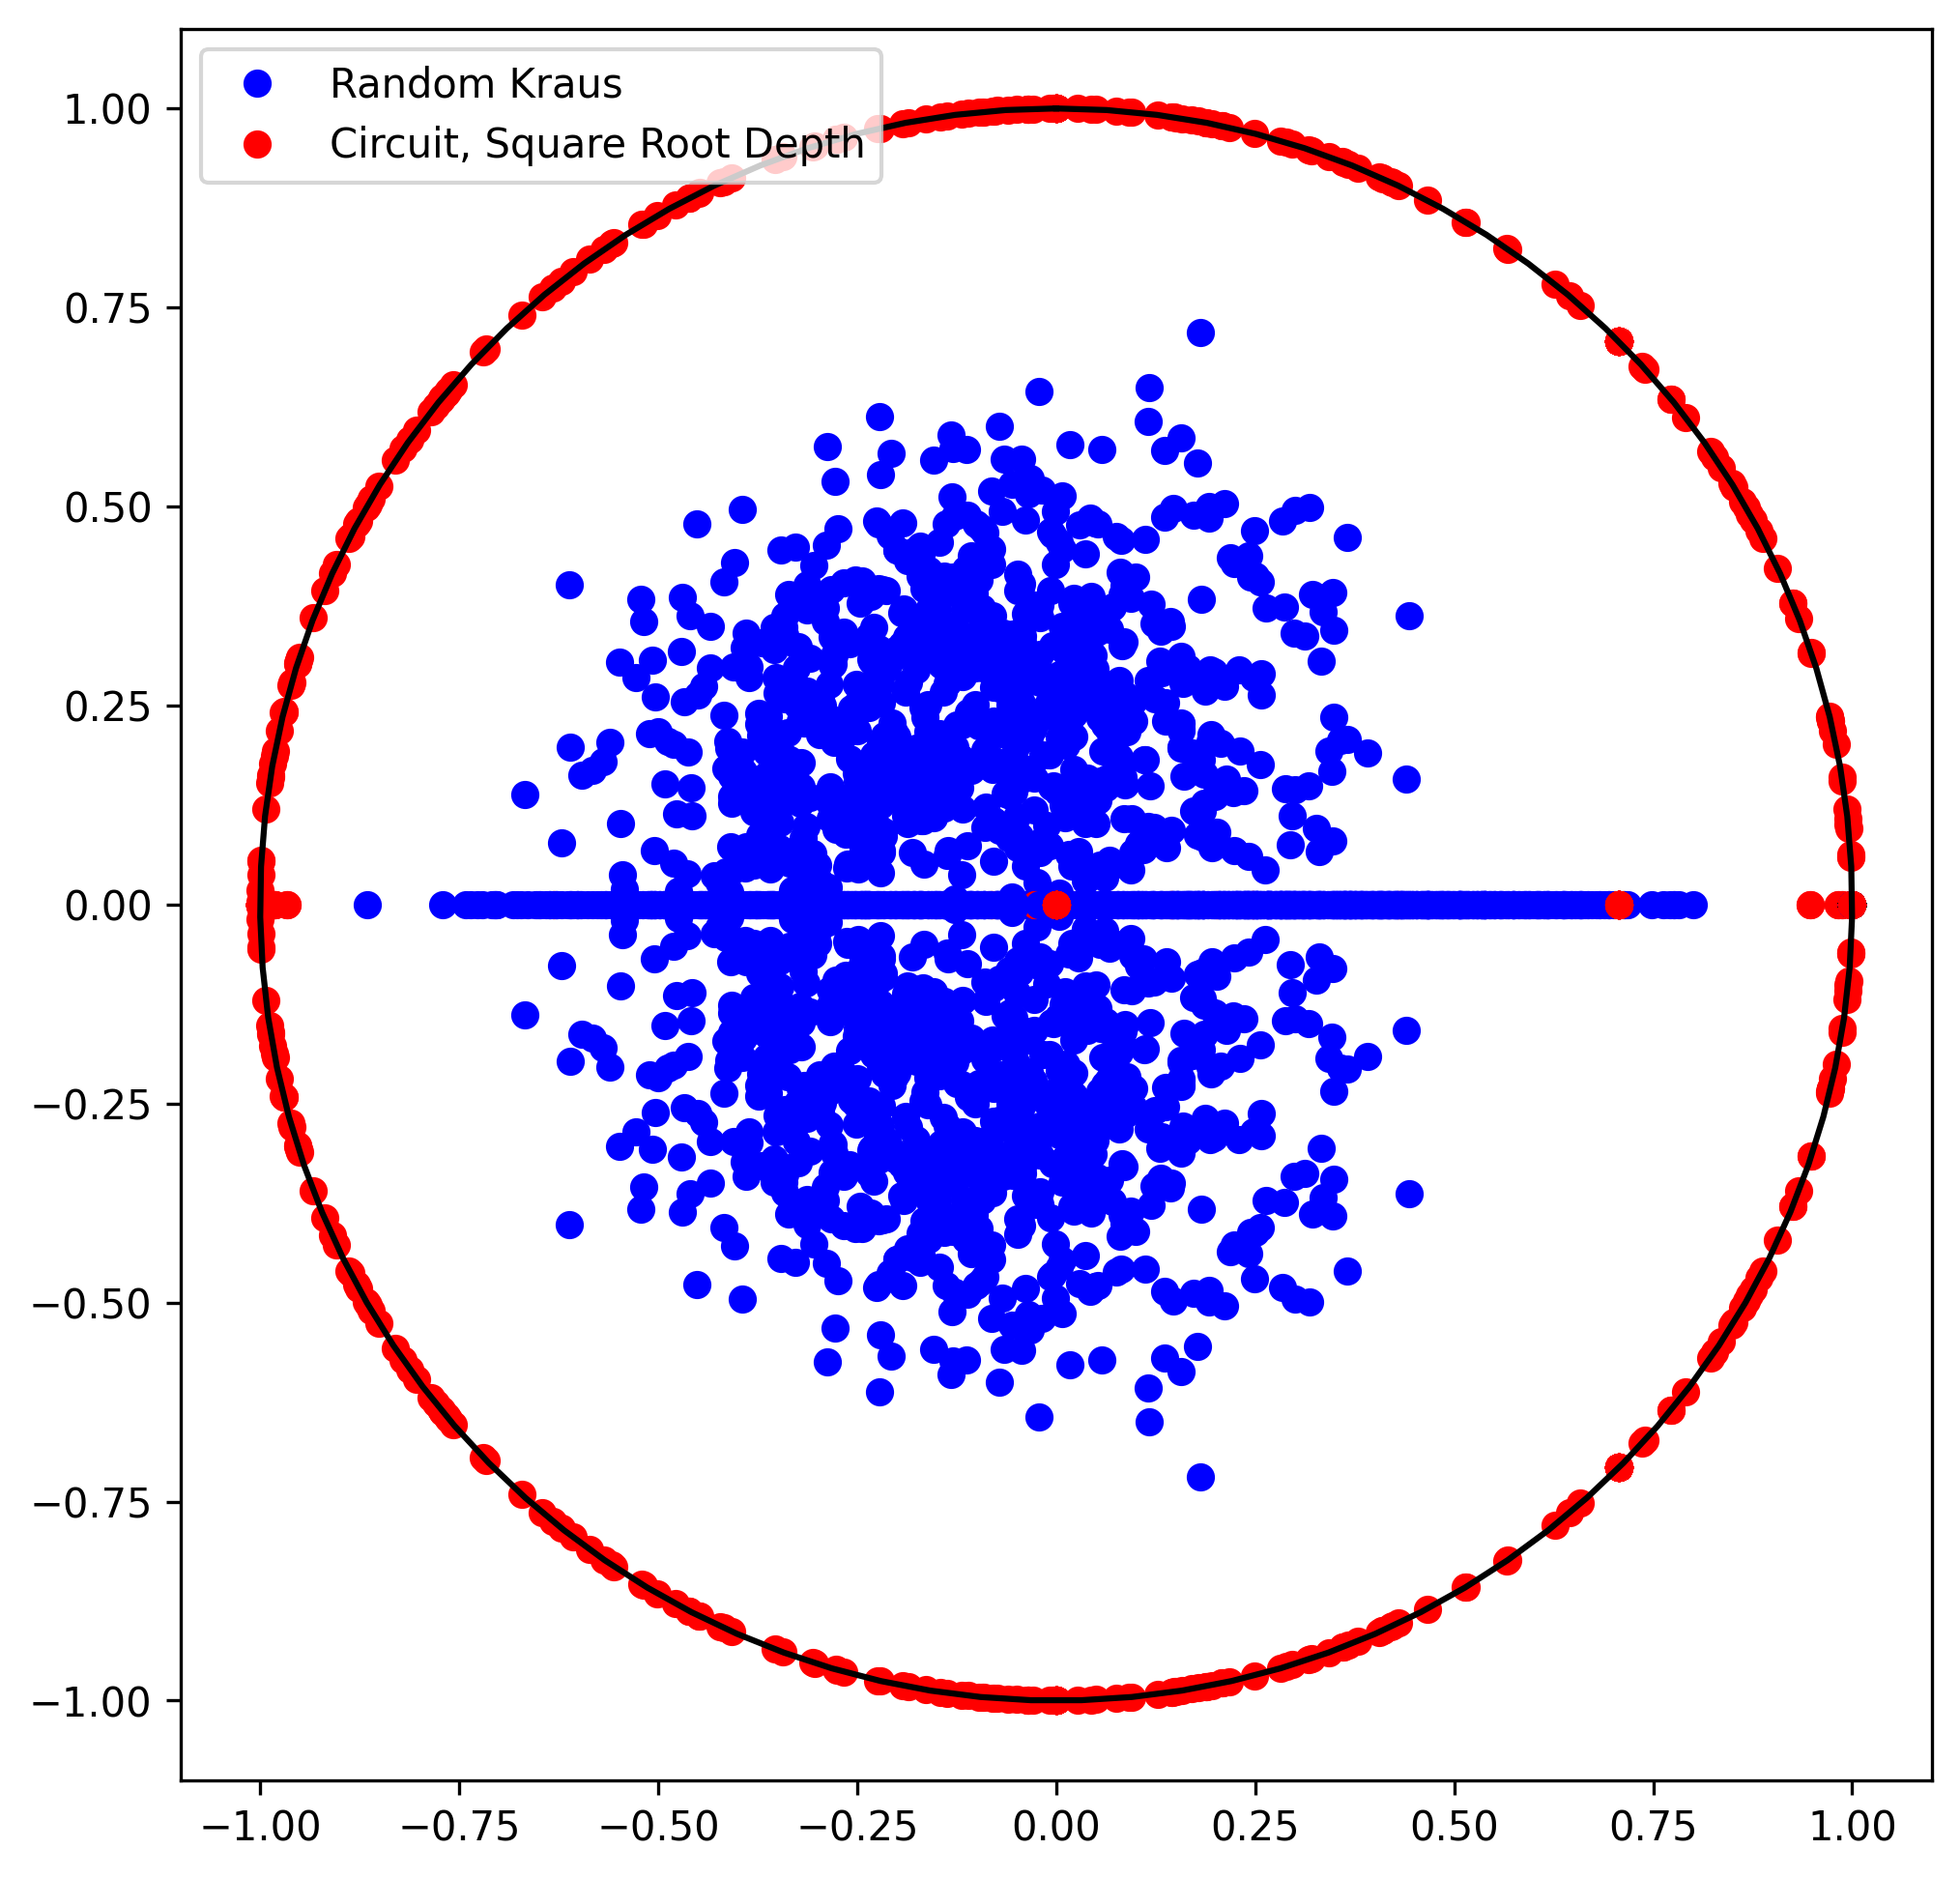

In [11]:
n = 1
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in range(1000):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=int(np.sqrt(n_eff)))
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Root Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/oneQubit_squareRootDepth.pdf")
plt.show()

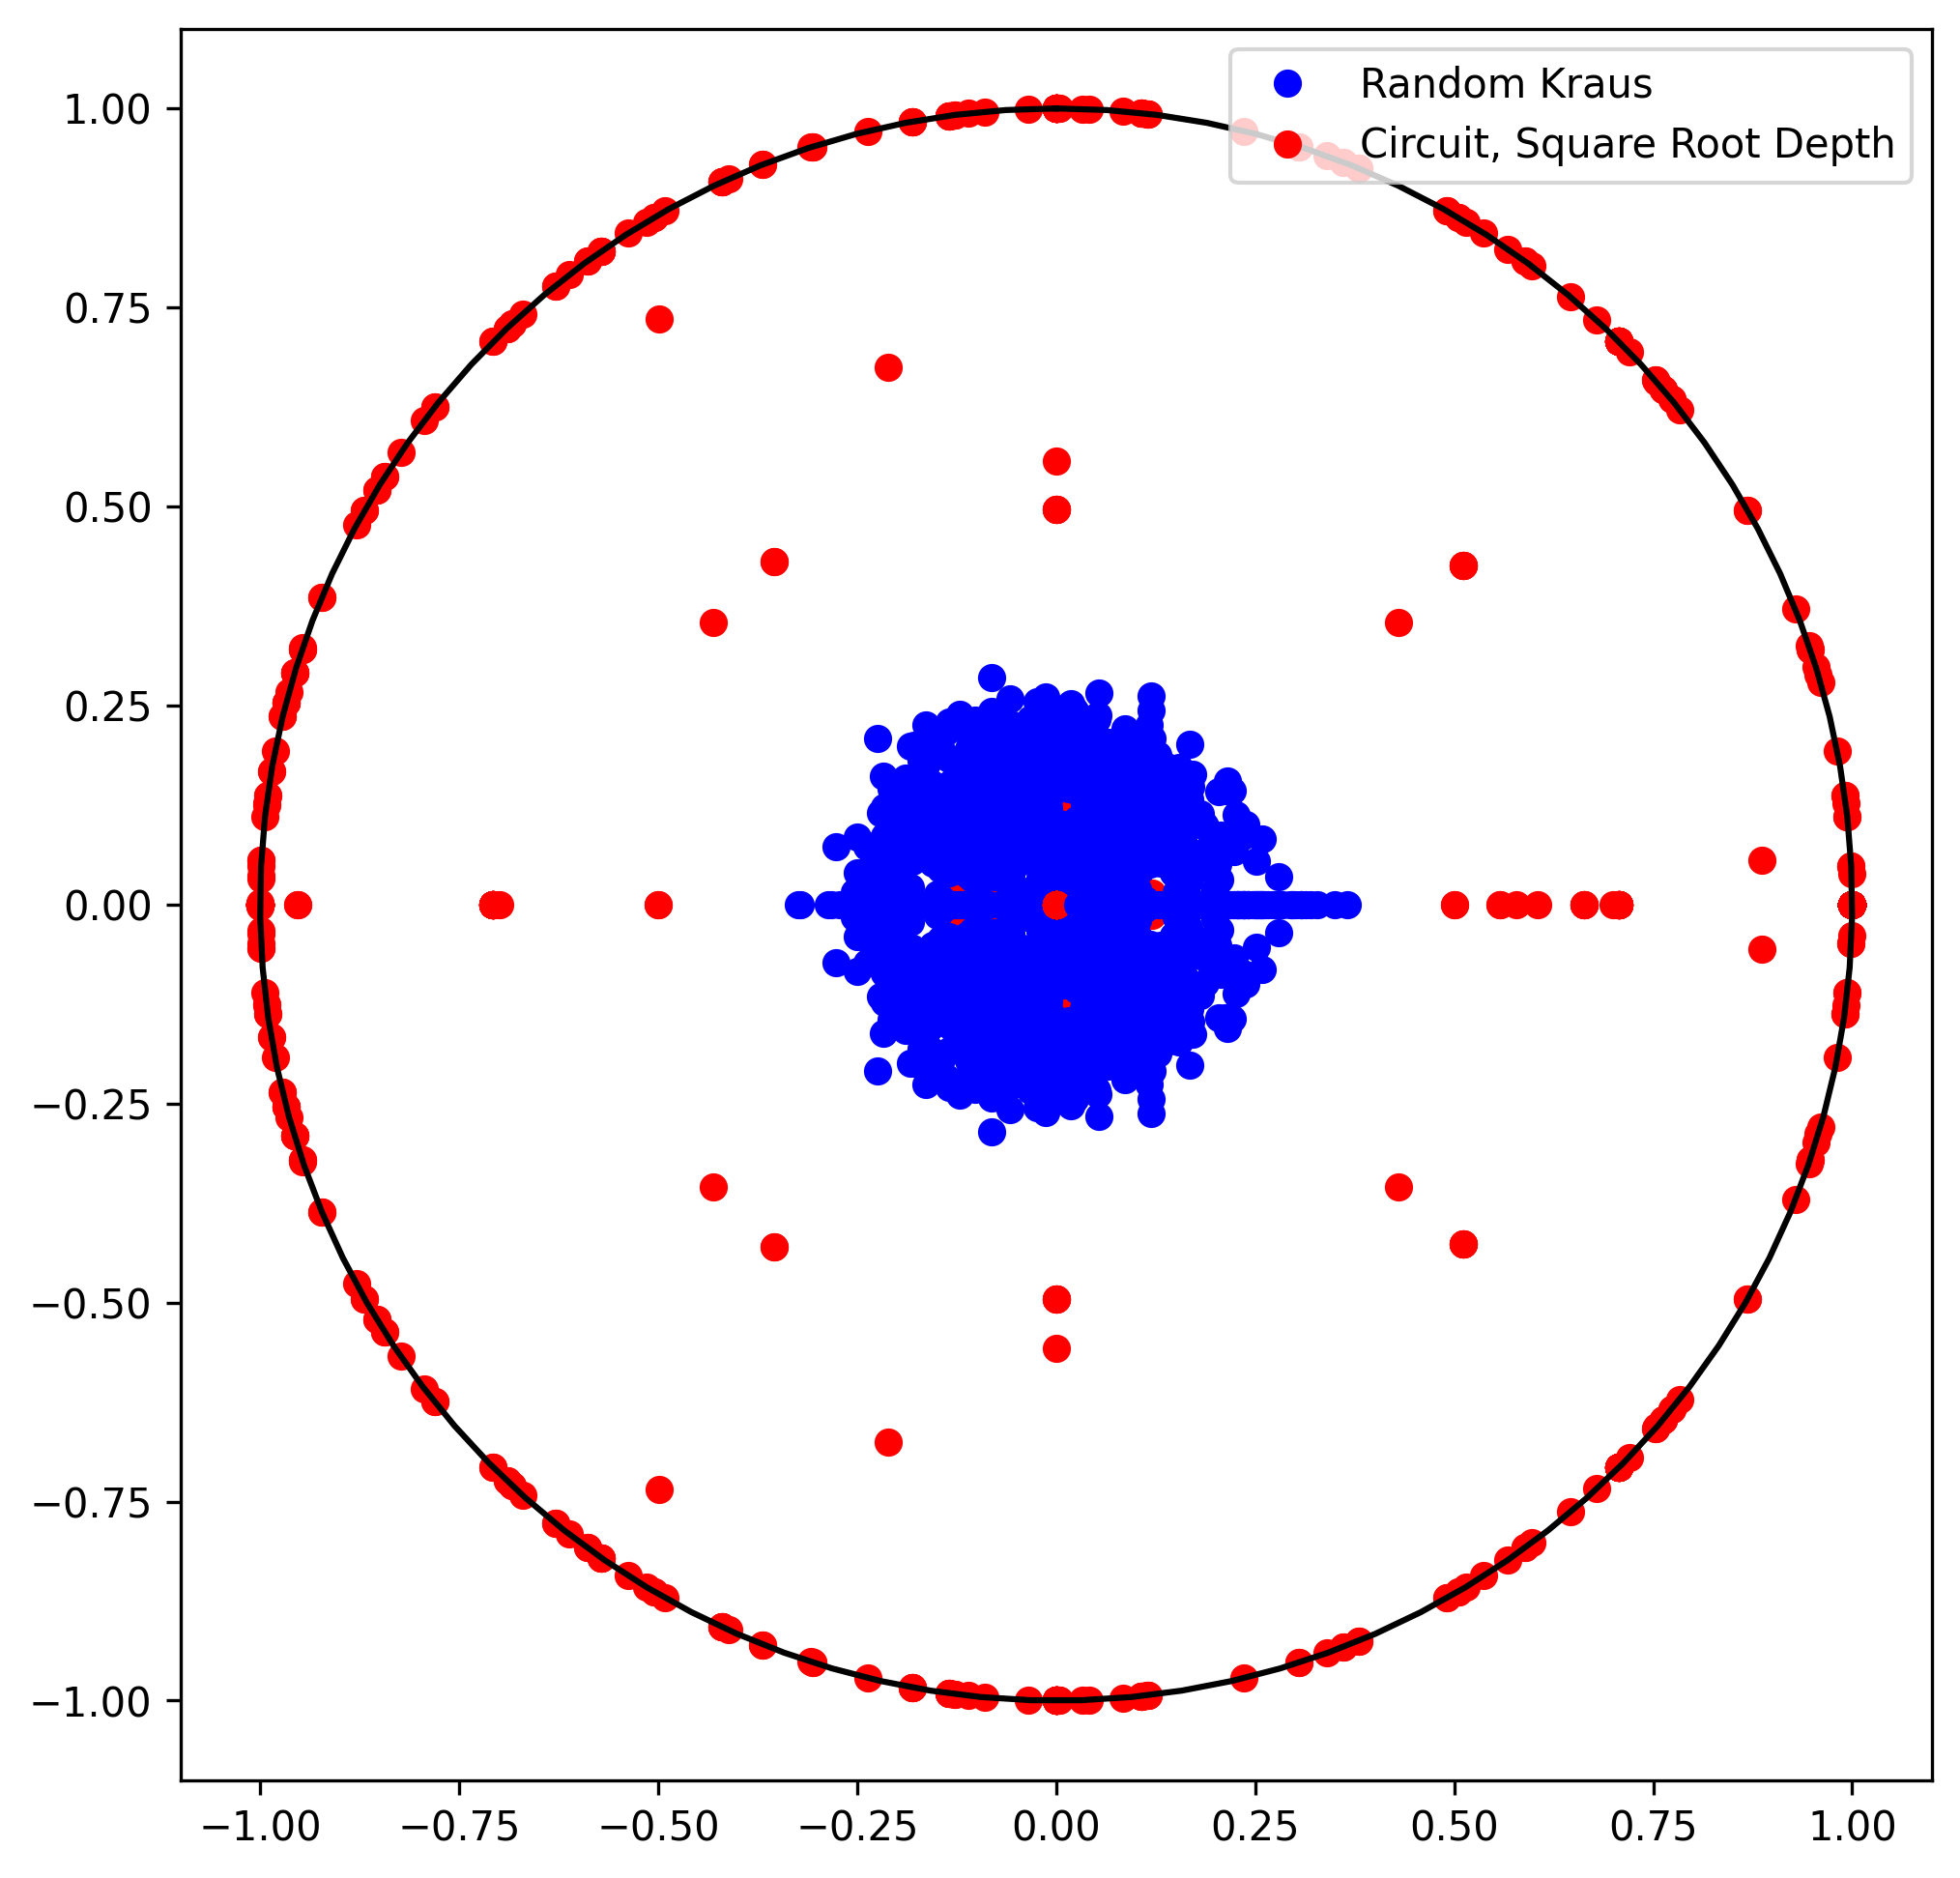

In [12]:
n = 2
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(100)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=int(np.sqrt(n_eff)))
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Root Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/twoQubit_squareRootDepth.pdf")
plt.show()

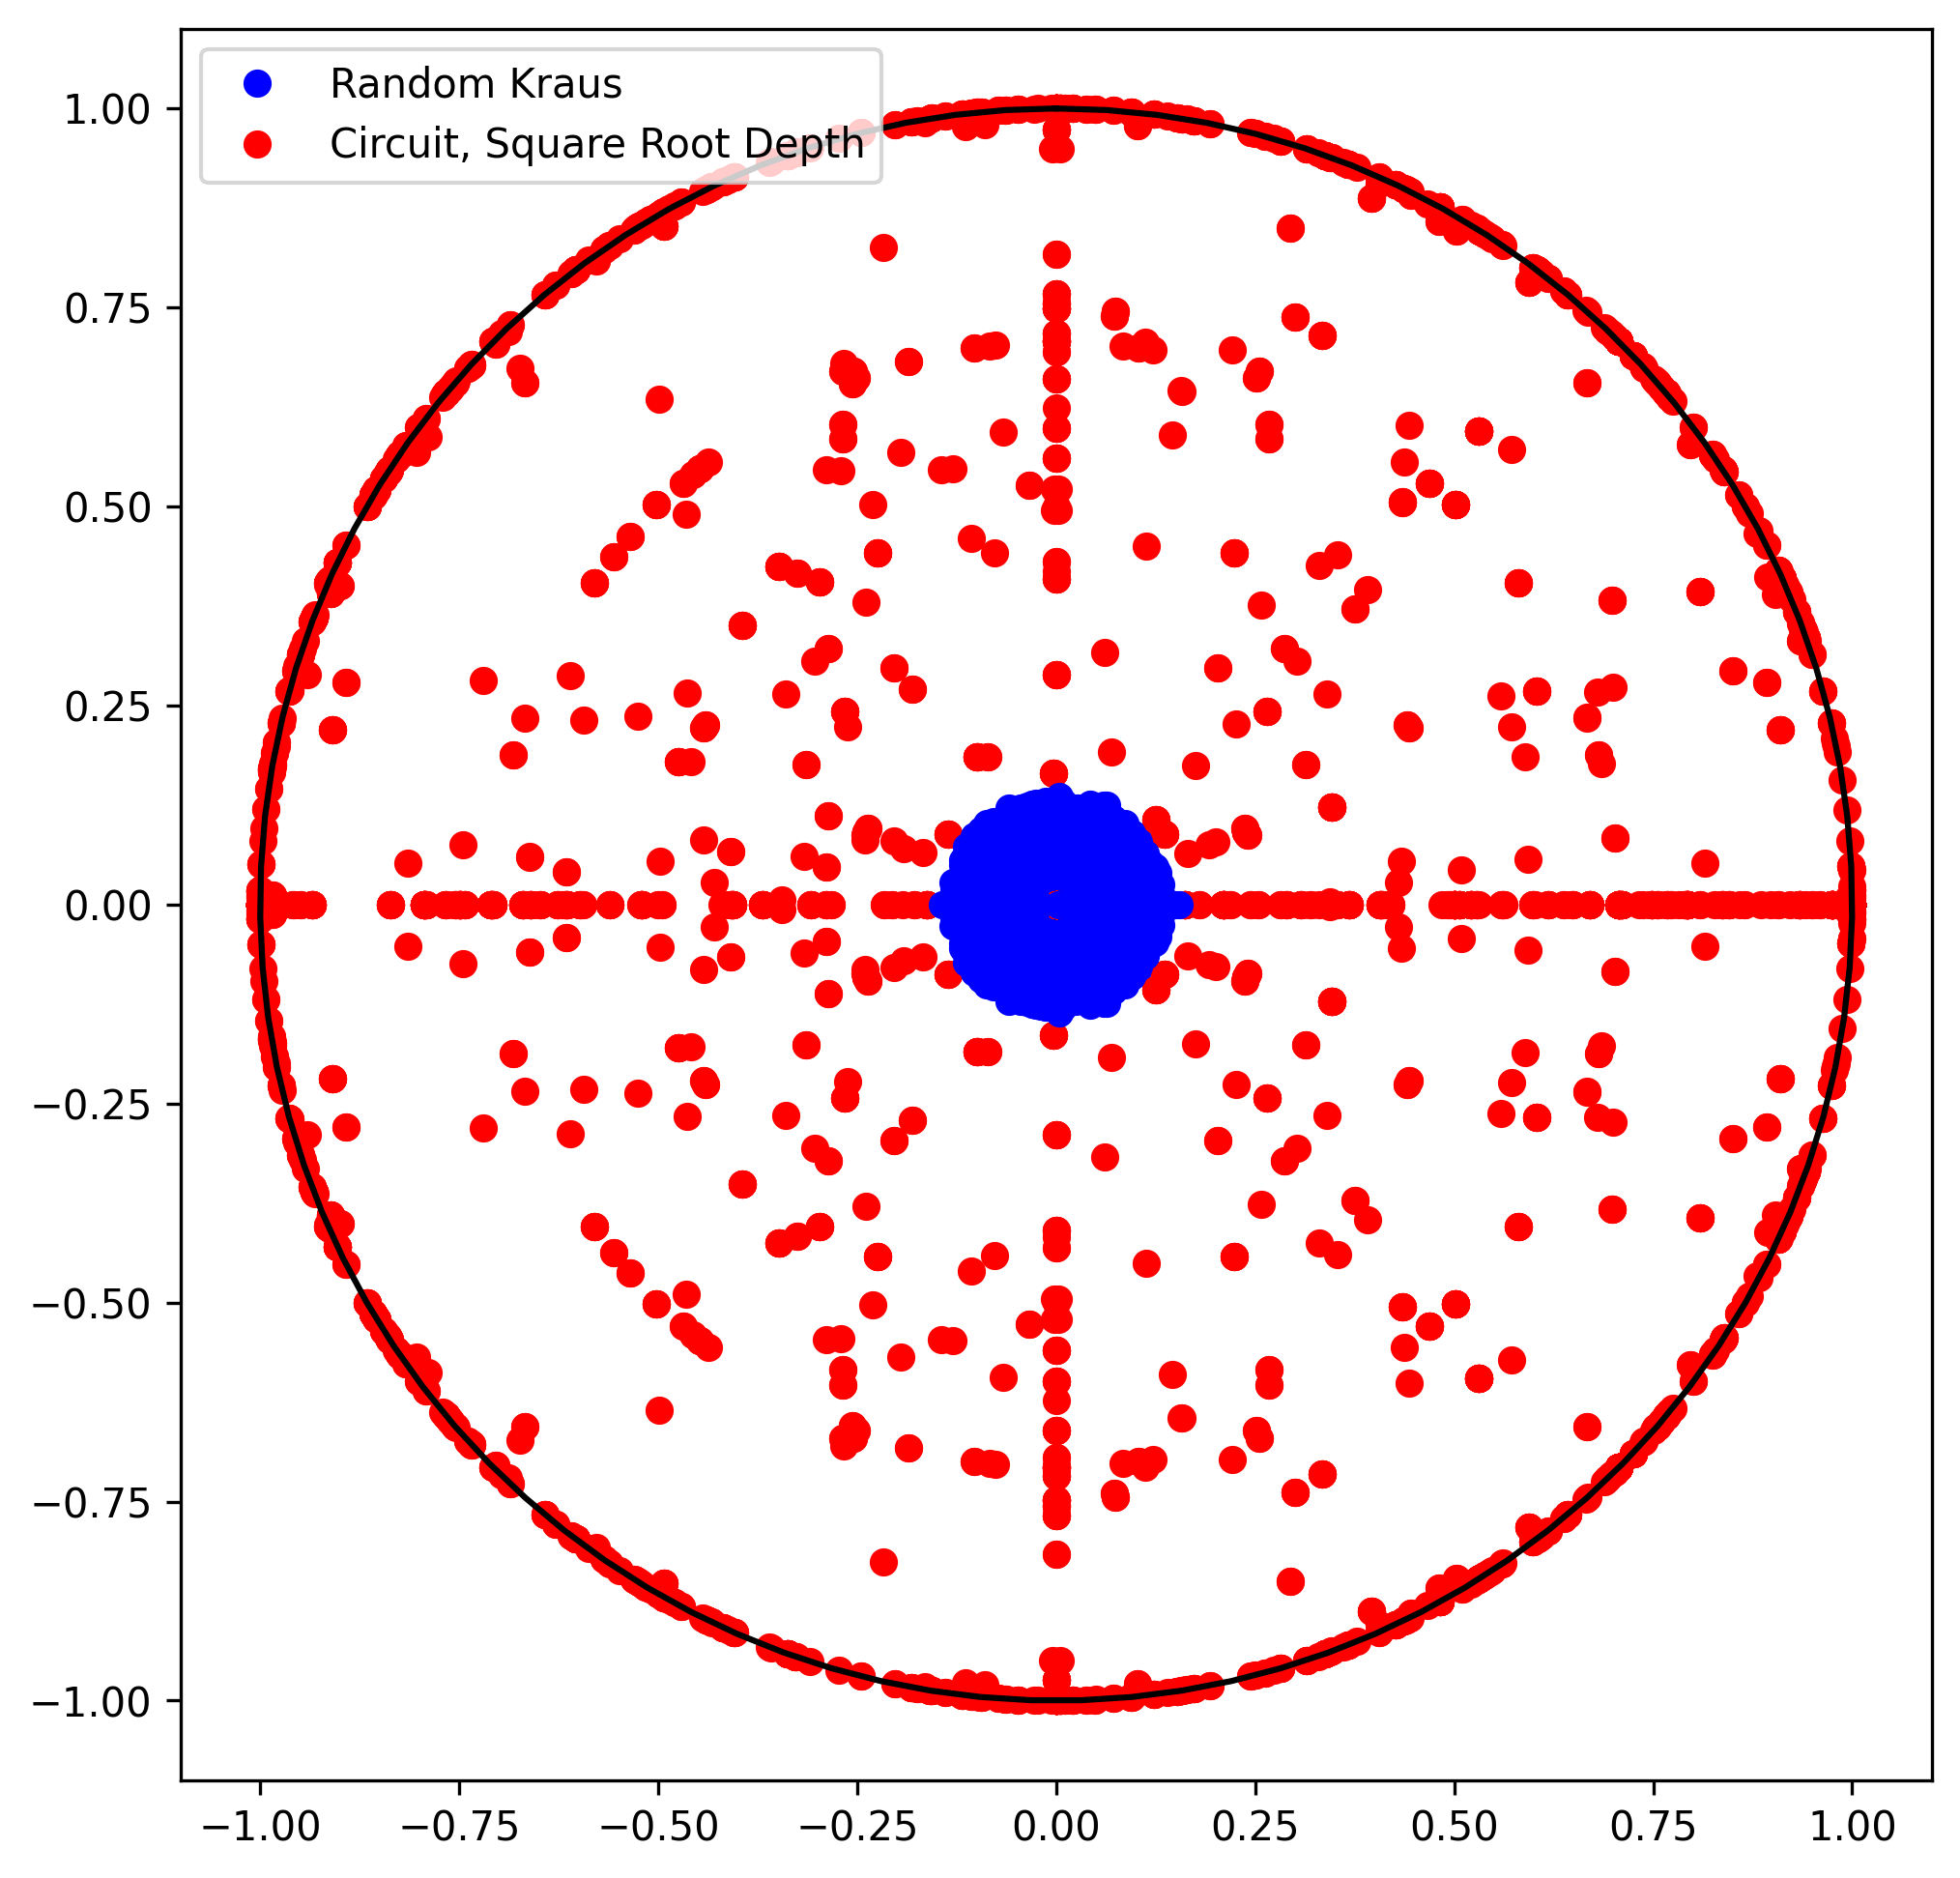

In [13]:
n = 3
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))

random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(100)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=int(np.sqrt(n_eff)))
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Root Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/threeQubit_squareRootDepth.pdf")
plt.show()

In [ ]:
n = 4
d = 2**n
rank = d**2
n_eff = int(np.log2(d*rank))


random.seed(42)
np.random.seed(42)

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
for i in tqdm(range(10)):
    kraus_map = KrausMap(d=d, rank=rank)
    choi_map = maps_to_choi([kraus_map])
    spectrum1 = choi_spectrum(choi_map)

    U = generate_random_circuit_unitary(d, rank, depth=int(np.sqrt(n_eff)))
    kraus_map.generate_map(U=U)
    choi_map = maps_to_choi([kraus_map])
    spectrum2 = choi_spectrum(choi_map)

    plt.plot(*spectrum1, "bo")
    plt.plot(*spectrum2, "ro")

plt.legend(["Random Kraus", "Circuit, Square Root Depth"])
plt.plot(*circle, "k")
fig.savefig("../../latex/figures/fourQubit_squareRootDepth.pdf")
plt.show()